### New jupyter notebook to bring task 1, 2 and 3 together

import moduls

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
import datetime as dt
from datetime import date, time, datetime, timedelta
import plotly.offline as pyo
import plotly.graph_objects as px
import plotly.express as go
pyo.init_notebook_mode()

### Task 1 Data Collection and Preparation

readin the boston 2016 and weather hourly boston data

In [2]:
boston = pd.read_csv("boston_2016.csv")
weather = pd.read_csv("weather_hourly_boston.csv")

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


In [4]:
boston.isna().sum()

start_time            0
end_time              0
start_station_id      0
end_station_id        0
start_station_name    0
end_station_name      0
bike_id               0
user_type             0
dtype: int64

0 null values in boston data
start_time and end_time are object Dtype, but should be datetime

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [6]:
weather.isna().sum()

date_time    494
max_temp     494
min_temp     494
precip       492
dtype: int64

### weather data praparation

there are null values in the waether data set
date is object Dtype, but should be datetime

##### Get intuition when NULL values appear and whether there are enough values around them

In [7]:
missing_value_index = [] #creating new list with no values
NaNFrame = weather.isna() #getting DataFrame containing TRUE if NaN is given
num_rows, num_cols = NaNFrame.values.shape #shape returns two values
boolean_switch = False 
z = 0

for i in range(0,num_rows):
    for j in range(0,num_cols):
        if NaNFrame.values[i][j]: 
            boolean_switch = True #boolean_switch is set to True if at least one column found, which contains NaN
     
    # if at the end of the loop boolean_switch is true, add this position and the row before and afterwards to the list
    if boolean_switch:
        missing_value_index.append(z-1) 
        missing_value_index.append(z)
        missing_value_index.append(z+1)
        
    # prepare for next loop
    z += 1
    boolean_switch = False
            
            
# Display all rows for which we have found that at least one value is absent
weather.loc[missing_value_index]

date_time  max_temp  min_temp  precip
97     2015-01-06 02:00:00      -6.7      -6.7     0.0
98                     NaN       NaN       NaN     NaN
99     2015-01-06 04:00:00      -7.8      -7.8     0.0
144    2015-01-08 01:00:00     -11.1     -11.1     0.0
145                    NaN       NaN       NaN     NaN
...                    ...       ...       ...     ...
43594                  NaN       NaN       NaN     NaN
43595  2019-12-22 12:00:00      -0.6      -0.6     0.0
43668  2019-12-25 13:00:00       0.6       0.6     0.0
43669                  NaN       NaN       NaN     NaN
43670  2019-12-25 15:00:00       2.2       2.2     0.0

[1482 rows x 4 columns]

As we can see, most of the times every NaN is surrounded by valid values. As during one hour the temperature should not change dramatically, we can use forward fill.

In [8]:
weather.fillna(method='ffill', inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43848 non-null  object 
 1   max_temp   43848 non-null  float64
 2   min_temp   43848 non-null  float64
 3   precip     43848 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [9]:
weather

date_time  max_temp  min_temp  precip
0      2015-01-02 01:00:00      -1.1      -1.1     0.0
1      2015-01-02 02:00:00      -1.1      -1.1     0.0
2      2015-01-02 03:00:00      -0.6      -0.6     0.0
3      2015-01-02 04:00:00      -0.6      -0.6     0.0
4      2015-01-02 05:00:00      -0.6      -0.6     0.0
...                    ...       ...       ...     ...
43843  2020-01-01 20:00:00       5.0       5.0     0.0
43844  2020-01-01 21:00:00       4.4       4.4     0.0
43845  2020-01-01 22:00:00       4.4       4.4     0.0
43846  2020-01-01 23:00:00       3.9       3.9     0.0
43847  2020-01-02 00:00:00       3.3       3.3     0.0

[43848 rows x 4 columns]

### only the weather data from 2016 are needed
change Dtype from date_time to datetime
define datetime values for the beging and end of 2016

In [10]:
### weather date_time change Dtype from object to date_time
weather["date_time"] = pd.to_datetime(weather["date_time"])

In [11]:
### begin of 2016
dateY1 = datetime(year=2016, month=1, day=1, hour=0, minute= 0, second=0, microsecond=0)
print(dateY1)

2016-01-01 00:00:00


In [12]:
### end of 2016
dateY2 = datetime(year=2016, month=12, day=31, hour=23, minute= 59, second=59, microsecond=0)
print(dateY2)

2016-12-31 23:59:59


In [13]:
## only weather data from 2016
weather2016 = weather[(weather["date_time"] >= dateY1) & (weather["date_time"] <= dateY2)]
weather2016.reset_index(drop = True, inplace = True)
weather2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8784 non-null   datetime64[ns]
 1   max_temp   8784 non-null   float64       
 2   min_temp   8784 non-null   float64       
 3   precip     8784 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 274.6 KB


### add avg temp, date and hour

In [14]:
weather2016["avg_temp"] = (weather2016["max_temp"] + weather2016["min_temp"]) / 2
weather2016

date_time  max_temp  min_temp  precip  avg_temp
0    2016-01-01 01:00:00       5.0       5.0     0.0       5.0
1    2016-01-01 02:00:00       5.0       5.0     0.0       5.0
2    2016-01-01 03:00:00       4.4       4.4     0.0       4.4
3    2016-01-01 04:00:00       4.4       4.4     0.0       4.4
4    2016-01-01 05:00:00       3.9       3.9     0.0       3.9
...                  ...       ...       ...     ...       ...
8779 2016-12-31 19:00:00       1.7       1.7     0.0       1.7
8780 2016-12-31 20:00:00       1.7       1.7     0.0       1.7
8781 2016-12-31 21:00:00       1.7       1.7     0.0       1.7
8782 2016-12-31 22:00:00       2.2       2.2     0.0       2.2
8783 2016-12-31 23:00:00       3.3       3.3     0.0       3.3

[8784 rows x 5 columns]

In [15]:
### add date and hour

weather2016["date"] = pd.DatetimeIndex(weather2016["date_time"]).date
weather2016["date"] = pd.to_datetime(weather2016["date"])
#weather2016["month"] = pd.DatetimeIndex(weather2016["date_time"]).month
#weather2016["weekday"] = pd.DatetimeIndex(weather2016["date_time"]).weekday
weather2016["hour"] = pd.DatetimeIndex(weather2016["date_time"]).hour
#weather2016["minute"] = pd.DatetimeIndex(weather2016["date_time"]).minute
weather2016

date_time  max_temp  min_temp  precip  avg_temp       date  \
0    2016-01-01 01:00:00       5.0       5.0     0.0       5.0 2016-01-01   
1    2016-01-01 02:00:00       5.0       5.0     0.0       5.0 2016-01-01   
2    2016-01-01 03:00:00       4.4       4.4     0.0       4.4 2016-01-01   
3    2016-01-01 04:00:00       4.4       4.4     0.0       4.4 2016-01-01   
4    2016-01-01 05:00:00       3.9       3.9     0.0       3.9 2016-01-01   
...                  ...       ...       ...     ...       ...        ...   
8779 2016-12-31 19:00:00       1.7       1.7     0.0       1.7 2016-12-31   
8780 2016-12-31 20:00:00       1.7       1.7     0.0       1.7 2016-12-31   
8781 2016-12-31 21:00:00       1.7       1.7     0.0       1.7 2016-12-31   
8782 2016-12-31 22:00:00       2.2       2.2     0.0       2.2 2016-12-31   
8783 2016-12-31 23:00:00       3.3       3.3     0.0       3.3 2016-12-31   

      hour  
0        1  
1        2  
2        3  
3        4  
4        5  
...    ...  
8779    19  
8780    20  
8781    21  
8782    22  
8783    23  

[8784 rows x 7 columns]

In [16]:
weather2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8784 non-null   datetime64[ns]
 1   max_temp   8784 non-null   float64       
 2   min_temp   8784 non-null   float64       
 3   precip     8784 non-null   float64       
 4   avg_temp   8784 non-null   float64       
 5   date       8784 non-null   datetime64[ns]
 6   hour       8784 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 480.5 KB


### weather 2016 data review

In [17]:
weather2016.describe()

max_temp     min_temp       precip     avg_temp         hour
count  8784.000000  8784.000000  8784.000000  8784.000000  8784.000000
mean     11.737306    11.684210     0.080715    11.710758    11.509904
std       9.794149     9.795362     0.272412     9.793892     6.920172
min     -22.800000   -22.800000     0.000000   -22.800000     0.000000
25%       4.400000     4.400000     0.000000     4.400000     6.000000
50%      11.700000    11.700000     0.000000    11.700000    11.000000
75%      19.400000    19.400000     0.000000    19.400000    18.000000
max      36.100000    36.100000     1.000000    36.100000    23.000000

In [18]:
### nb. of hours with precip(rain, snow) =1 and without =0
weather2016["precip"].value_counts()

0.0    8075
1.0     709
Name: precip, dtype: int64

In [19]:
### nb. of hours with different max and min temps
weather2016[weather2016["max_temp"] != weather2016["min_temp"]].count()

date_time    570
max_temp     570
min_temp     570
precip       570
avg_temp     570
date         570
hour         570
dtype: int64

### boston data preparation

In [20]:
boston

start_time                  end_time  start_station_id  \
0             2016-01-01 00:08:07       2016-01-01 00:40:26                36   
1             2016-01-01 00:08:19       2016-01-01 00:40:27                36   
2             2016-01-01 00:10:15       2016-01-01 00:40:29                36   
3             2016-01-01 00:10:22       2016-01-01 00:40:11                36   
4             2016-01-01 00:15:36       2016-01-01 00:31:17                36   
...                           ...                       ...               ...   
1236198  2016-12-31 23:01:46.2540  2016-12-31 23:14:20.6250                 8   
1236199  2016-12-31 23:14:21.2330  2016-12-31 23:18:03.1850               190   
1236200  2016-12-31 23:15:38.5800  2016-12-31 23:24:43.0190                33   
1236201  2016-12-31 23:20:35.7960  2016-12-31 23:27:58.5830                90   
1236202  2016-12-31 23:34:18.3040  2016-12-31 23:42:20.6140                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1236198              33  Union Square - Brighton Ave at Cambridge St   
1236199               6            Nashua Street at Red Auerbach Way   
1236200              36                               Kenmore Square   
1236201             141  Lechmere Station at Cambridge St / First St   
1236202              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  
0                            Buswell St. at Park Dr.     1406  Subscriber  
1                            Buswell St. at Park Dr.     1121  Subscriber  
2                            Buswell St. at Park Dr.      474  Subscriber  
3                            Buswell St. at Park Dr.     1504  Subscriber  
4                       MIT at Mass Ave / Amherst St      913    Customer  
...                                              ...      ...         ...  
1236198                               Kenmore Square      230  Subscriber  
1236199                       Cambridge St at Joy St     1420  Subscriber  
1236200  Copley Square - Dartmouth St at Boylston St      230  Subscriber  
1236201                               Kendall Street       74  Subscriber  
1236202  Lechmere Station at Cambridge St / First St      309  Subscriber  

[1236203 rows x 8 columns]

start_time and end_time needs to be converted to datetime 
drop microseconds

In [21]:
### change boston start_time and end_time from object to datetime, remove microseconds

boston["start_time"] = pd.to_datetime(boston["start_time"])
boston["start_time"] = boston["start_time"].apply(lambda x: x.replace(microsecond = 0))

boston["end_time"] = pd.to_datetime(boston["end_time"])
boston["end_time"] = boston["end_time"].apply(lambda x: x.replace(microsecond = 0))

In [22]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [23]:
boston

start_time            end_time  start_station_id  \
0       2016-01-01 00:08:07 2016-01-01 00:40:26                36   
1       2016-01-01 00:08:19 2016-01-01 00:40:27                36   
2       2016-01-01 00:10:15 2016-01-01 00:40:29                36   
3       2016-01-01 00:10:22 2016-01-01 00:40:11                36   
4       2016-01-01 00:15:36 2016-01-01 00:31:17                36   
...                     ...                 ...               ...   
1236198 2016-12-31 23:01:46 2016-12-31 23:14:20                 8   
1236199 2016-12-31 23:14:21 2016-12-31 23:18:03               190   
1236200 2016-12-31 23:15:38 2016-12-31 23:24:43                33   
1236201 2016-12-31 23:20:35 2016-12-31 23:27:58                90   
1236202 2016-12-31 23:34:18 2016-12-31 23:42:20                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1236198              33  Union Square - Brighton Ave at Cambridge St   
1236199               6            Nashua Street at Red Auerbach Way   
1236200              36                               Kenmore Square   
1236201             141  Lechmere Station at Cambridge St / First St   
1236202              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  
0                            Buswell St. at Park Dr.     1406  Subscriber  
1                            Buswell St. at Park Dr.     1121  Subscriber  
2                            Buswell St. at Park Dr.      474  Subscriber  
3                            Buswell St. at Park Dr.     1504  Subscriber  
4                       MIT at Mass Ave / Amherst St      913    Customer  
...                                              ...      ...         ...  
1236198                               Kenmore Square      230  Subscriber  
1236199                       Cambridge St at Joy St     1420  Subscriber  
1236200  Copley Square - Dartmouth St at Boylston St      230  Subscriber  
1236201                               Kendall Street       74  Subscriber  
1236202  Lechmere Station at Cambridge St / First St      309  Subscriber  

[1236203 rows x 8 columns]

review boston data

In [24]:
###check unique values
boston.nunique()

start_time            1176852
end_time              1175109
start_station_id          189
end_station_id            189
start_station_name        276
end_station_name          276
bike_id                  1802
user_type                   2
dtype: int64

### 189 distinct start and end station_ids, but 276 distinct start and end station_names 
### 1802 bike ids
### 2 User types

##### there are fewer start_station_ids and end_station_ids than start and end station names

In [25]:
### how often is a start_station_id assigned to a start_station_name by number
boston.groupby('start_station_id').start_station_name.nunique()

start_station_id
1      1
3      2
4      2
5      2
6      2
      ..
215    2
216    1
217    1
218    2
219    2
Name: start_station_name, Length: 189, dtype: int64

In [26]:
### how often is a end_station_id assigned to a end_station_name by number
boston.groupby('end_station_id').end_station_name.nunique()

end_station_id
1      1
3      2
4      2
5      2
6      2
      ..
215    2
216    1
217    1
218    2
219    2
Name: end_station_name, Length: 189, dtype: int64

In [27]:
### how often is a start_station_id assigned to a start_station_name by name
boston.groupby('start_station_id').start_station_name.unique()

start_station_id
1                                [18 Dorrance Warehouse]
3      [Colleges of the Fenway, Colleges of the Fenwa...
4      [Tremont St. at Berkeley St., Tremont St at E ...
5      [Northeastern U / North Parking Lot, Northeast...
6      [Cambridge St. at Joy St., Cambridge St at Joy...
                             ...                        
215    [The Eddy at New Street, The Eddy - New St at ...
216                            [Glendon St at Condor St]
217    [Orient Heights T Stop - Bennington St at Sara...
218    [Watermark Seaport, Watermark Seaport - Boston...
219    [Central Square East Boston - Porter Street at...
Name: start_station_name, Length: 189, dtype: object

In [28]:
### how often is a end_station_id assigned to a end_station_name by name
boston.groupby('end_station_id').end_station_name.unique()

end_station_id
1                                [18 Dorrance Warehouse]
3      [Colleges of the Fenway, Colleges of the Fenwa...
4      [Tremont St. at Berkeley St., Tremont St at E ...
5      [Northeastern U / North Parking Lot, Northeast...
6      [Cambridge St. at Joy St., Cambridge St at Joy...
                             ...                        
215    [The Eddy at New Street, The Eddy - New St at ...
216                            [Glendon St at Condor St]
217    [Orient Heights T Stop - Bennington St at Sara...
218    [Watermark Seaport, Watermark Seaport - Boston...
219    [Central Square East Boston - Porter Street at...
Name: end_station_name, Length: 189, dtype: object

In [29]:
### print all sorted start_station_ids
print(boston.sort_values("start_station_id")["start_station_id"].unique())

[  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  84  85  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 124 125 126 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 145 146 149 150 151 152 153 158 159 160 161 162
 163 167 169 170 171 173 174 175 176 177 178 179 180 183 184 185 186 189
 190 192 193 194 195 196 197 199 200 201 202 203 204 205 207 208 209 210
 211 212 213 214 215 216 217 218 219]


In [30]:
### print all start_station_names
### print(boston.sort_values("start_station_id")["start_station_name"].unique())

In [31]:
### print all sorted end_station_ids
print(boston.sort_values("end_station_id")["end_station_id"].unique())

[  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  21  22  23  24  25  26  27  29  30  31  32  33  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  84  85  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 124 125 126 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 145 146 149 150 151 152 153 158 159 160 161 162
 163 167 169 170 171 173 174 175 176 177 178 179 180 183 184 185 186 189
 190 192 193 194 195 196 197 199 200 201 202 203 204 205 207 208 209 210
 211 212 213 214 215 216 217 218 219]


In [32]:
### print all end_station_names
### print(boston.sort_values("end_station_id")["end_station_name"].unique())

### Some station ids have 2 station names assigned, possibly because they were renamed
### for example "Colleges of the Fenway" and "Colleges of the Fenway - Fenway at Avenue Louis Pasteur" with station_id 3

###
### add the trip_time as time_delta from start and end time


In [33]:
boston["trip_time"] = boston["end_time"] - boston["start_time"]
boston

start_time            end_time  start_station_id  \
0       2016-01-01 00:08:07 2016-01-01 00:40:26                36   
1       2016-01-01 00:08:19 2016-01-01 00:40:27                36   
2       2016-01-01 00:10:15 2016-01-01 00:40:29                36   
3       2016-01-01 00:10:22 2016-01-01 00:40:11                36   
4       2016-01-01 00:15:36 2016-01-01 00:31:17                36   
...                     ...                 ...               ...   
1236198 2016-12-31 23:01:46 2016-12-31 23:14:20                 8   
1236199 2016-12-31 23:14:21 2016-12-31 23:18:03               190   
1236200 2016-12-31 23:15:38 2016-12-31 23:24:43                33   
1236201 2016-12-31 23:20:35 2016-12-31 23:27:58                90   
1236202 2016-12-31 23:34:18 2016-12-31 23:42:20                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1236198              33  Union Square - Brighton Ave at Cambridge St   
1236199               6            Nashua Street at Red Auerbach Way   
1236200              36                               Kenmore Square   
1236201             141  Lechmere Station at Cambridge St / First St   
1236202              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  \
0                            Buswell St. at Park Dr.     1406  Subscriber   
1                            Buswell St. at Park Dr.     1121  Subscriber   
2                            Buswell St. at Park Dr.      474  Subscriber   
3                            Buswell St. at Park Dr.     1504  Subscriber   
4                       MIT at Mass Ave / Amherst St      913    Customer   
...                                              ...      ...         ...   
1236198                               Kenmore Square      230  Subscriber   
1236199                       Cambridge St at Joy St     1420  Subscriber   
1236200  Copley Square - Dartmouth St at Boylston St      230  Subscriber   
1236201                               Kendall Street       74  Subscriber   
1236202  Lechmere Station at Cambridge St / First St      309  Subscriber   

              trip_time  
0       0 days 00:32:19  
1       0 days 00:32:08  
2       0 days 00:30:14  
3       0 days 00:29:49  
4       0 days 00:15:41  
...                 ...  
1236198 0 days 00:12:34  
1236199 0 days 00:03:42  
1236200 0 days 00:09:05  
1236201 0 days 00:07:23  
1236202 0 days 00:08:02  

[1236203 rows x 9 columns]

### trip time analysis

In [34]:
print(boston["trip_time"].max())

346 days 03:14:39


In [35]:
print(boston["trip_time"].min())

-1 days +23:06:24


In [36]:
print(boston["trip_time"].mean())

0 days 00:22:45.223969687


### max trip duration almost a year and min duration negative

https://help.bluebikes.com/hc/en-us/articles/360034926492-How-long-can-I-keep-a-bike-out-

https://help.bluebikes.com/hc/en-us/articles/360034926452-What-if-I-keep-a-bike-out-too-long-

### longest pass allows 2 hours, every 30 minutes cost extra 2,5 USD or 2 USD (Income eligible members)
### single rides 30 min
### monthly and anual membership 45 min 
### adventure pass up to 2 hours
### Income eligible members (qualified for a discounted monthly or annual memberships) 60 min

### if the bike is not returned after 24 hours, a stolen/lost bike fee will be charged of 1200 USD + tax
###

In [37]:
boston[boston["trip_time"] < pd.Timedelta(0)]

start_time            end_time  start_station_id  \
1114243 2016-11-06 01:56:58 2016-11-06 01:21:56               104   
1114244 2016-11-06 01:58:25 2016-11-06 01:05:38                69   
1114245 2016-11-06 01:59:49 2016-11-06 01:06:13                54   

         end_station_id                                 start_station_name  \
1114243              32  Harvard University Radcliffe Quadrangle at She...   
1114244              82            Coolidge Corner - Beacon St @ Centre St   
1114245              16                               Tremont St / West St   

                                         end_station_name  bike_id  \
1114243                                   Landmark Centre      706   
1114244  Washington Square at Washington St. / Beacon St.     1477   
1114245                      Back Bay / South End Station     1681   

          user_type         trip_time  
1114243  Subscriber -1 days +23:24:58  
1114244  Subscriber -1 days +23:07:13  
1114245  Subscriber -1 days +23:06:24

In [38]:
### nb. of trips with negaive time
len(boston.loc[boston.trip_time < pd.Timedelta(0)])

3

In [39]:
boston[boston["trip_time"] > pd.Timedelta('2H')]

start_time            end_time  start_station_id  \
16      2016-01-01 01:22:29 2016-01-01 04:27:34                74   
17      2016-01-01 01:27:24 2016-01-01 04:27:28                74   
34      2016-01-01 02:27:25 2016-01-01 22:28:12               121   
35      2016-01-01 02:27:32 2016-01-01 21:56:27               121   
79      2016-01-01 12:12:05 2016-01-01 14:14:54                96   
...                     ...                 ...               ...   
1234118 2016-12-28 17:37:26 2016-12-28 20:05:47               135   
1234243 2016-12-28 19:12:12 2016-12-29 11:44:35                11   
1234799 2016-12-29 12:32:41 2016-12-29 15:39:34               131   
1234936 2016-12-29 19:20:27 2016-12-30 16:28:00               189   
1235589 2016-12-30 17:57:10 2016-12-30 21:26:25               177   

         end_station_id                                 start_station_name  \
16                   22                Harvard Square at Mass Ave/ Dunster   
17                   22                Harvard Square at Mass Ave/ Dunster   
34                  100                     West Broadway at Dorchester St   
35                  100                     West Broadway at Dorchester St   
79                   96  Cambridge Main Library at Broadway / Trowbridg...   
...                 ...                                                ...   
1234118              30                                   ID Building East   
1234243              41                          Longwood Ave at Binney St   
1234799             131                              Jackson Square T Stop   
1234936              91                                          Kendall T   
1235589             107                                    University Park   

                                          end_station_name  bike_id  \
16                       South Station - 700 Atlantic Ave.      232   
17                       South Station - 700 Atlantic Ave.     1162   
34                                            Davis Square     1062   
35                                            Davis Square     1496   
79       Cambridge Main Library at Broadway / Trowbridg...      751   
...                                                    ...      ...   
1234118      Brigham Circle - Francis St at Huntington Ave     1071   
1234243  Packard's Corner - Commonwealth Ave at Brighto...      595   
1234799                              Jackson Square T Stop      312   
1234936   One Kendall Square at Hampshire St / Portland St     1151   
1235589                                 Ames St at Main St      489   

          user_type       trip_time  
16       Subscriber 0 days 03:05:05  
17       Subscriber 0 days 03:00:04  
34       Subscriber 0 days 20:00:47  
35       Subscriber 0 days 19:28:55  
79         Customer 0 days 02:02:49  
...             ...             ...  
1234118  Subscriber 0 days 02:28:21  
1234243  Subscriber 0 days 16:32:23  
1234799  Subscriber 0 days 03:06:53  
1234936  Subscriber 0 days 21:07:33  
1235589  Subscriber 0 days 03:29:15  

[8627 rows x 9 columns]

In [40]:
### nb. of trips over 2 hours
len(boston.loc[boston.trip_time > pd.Timedelta('2H')])

8627

In [41]:
boston[boston["trip_time"] > pd.Timedelta('1D')]

start_time            end_time  start_station_id  \
206     2016-01-01 19:26:58 2016-01-04 07:55:25               104   
319     2016-01-02 13:12:13 2016-01-03 18:53:25               105   
875     2016-01-04 17:03:12 2016-01-08 07:10:13               177   
1362    2016-01-06 08:40:53 2016-04-05 07:43:55               118   
1584    2016-01-06 13:02:52 2016-01-07 13:38:10                97   
...                     ...                 ...               ...   
1231426 2016-12-26 02:01:14 2016-12-27 18:02:14               213   
1231438 2016-12-26 07:57:10 2017-01-03 10:09:25                21   
1232597 2016-12-27 14:46:37 2016-12-28 15:02:36                41   
1232756 2016-12-27 16:11:45 2016-12-28 20:19:05                67   
1233211 2016-12-28 00:09:49 2017-06-13 21:04:13                36   

         end_station_id                                 start_station_name  \
206                 117  Harvard University Radcliffe Quadrangle at She...   
319                  80    Lower Cambridgeport at Magazine St/Riverside Rd   
875                  91                                    University Park   
1362                 38          Linear Park - Mass. Ave. at Cameron Ave.    
1584                 97  Harvard University River Houses at DeWolfe St ...   
...                 ...                                                ...   
1231426             213  East Boston Neighborhood Health Center - 20 Ma...   
1231438              39                   Prudential Center - Belvedere St   
1232597             143  Packard's Corner - Commonwealth Ave at Brighto...   
1232756              91                       MIT at Mass Ave / Amherst St   
1233211              13        Copley Square - Dartmouth St at Boylston St   

                                          end_station_name  bike_id  \
206                                   Binney St / Sixth St     1450   
319                MIT Stata Center at Vassar St / Main St      864   
875       One Kendall Square at Hampshire St / Portland St      646   
1362                TD Garden - Causeway at Portal Park #2       56   
1584     Harvard University River Houses at DeWolfe St ...     1305   
...                                                    ...      ...   
1231426  East Boston Neighborhood Health Center - 20 Ma...     1726   
1231438                        Washington St at Rutland St      202   
1232597                              EF - North Point Park      734   
1232756   One Kendall Square at Hampshire St / Portland St     1832   
1233211  Boston Medical Center - E Concord St at Harris...      390   

          user_type         trip_time  
206        Customer   2 days 12:28:27  
319      Subscriber   1 days 05:41:12  
875        Customer   3 days 14:07:01  
1362     Subscriber  89 days 23:03:02  
1584     Subscriber   1 days 00:35:18  
...             ...               ...  
1231426    Customer   1 days 16:01:00  
1231438  Subscriber   8 days 02:12:15  
1232597    Customer   1 days 00:15:59  
1232756  Subscriber   1 days 04:07:20  
1233211    Customer 167 days 20:54:24  

[1079 rows x 9 columns]

In [42]:
### nb. of trips over 24 hours
len(boston.loc[boston.trip_time > pd.Timedelta('1D')])

1079

In [43]:
### nb. of trips over 2 hours and under 24 hours
print((len(boston.loc[boston.trip_time > pd.Timedelta('2H')]) - len(boston.loc[boston.trip_time > pd.Timedelta('1D')])))

7548


### 3 negative trip times
### 8627 trip times over 2 hours
### 7548 trip times over 2 hours and under 24 hours -> extra costs
### 1079 trip times over 24 hours -> lost or stolen bikes

###
### remove negative trip times and trip times over 24 hours

In [44]:
### remove and reset the index
bostonC = boston[(boston["trip_time"] > pd.Timedelta(0)) & (boston["trip_time"] < pd.Timedelta("1D"))]
bostonC.reset_index(drop = True, inplace = True)
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235121 entries, 0 to 1235120
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_time           1235121 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(3), object(3), timedelta64[ns](1)
memory usage: 84.8+ MB


In [45]:
bostonC["trip_time"].describe()

count                      1235121
mean     0 days 00:15:55.161627079
std      0 days 00:37:17.861576646
min                0 days 00:01:01
25%                0 days 00:06:37
50%                0 days 00:10:54
75%                0 days 00:17:51
max                0 days 23:56:42
Name: trip_time, dtype: object

In [46]:
print(boston["trip_time"].mean() - bostonC["trip_time"].mean())

0 days 00:06:50.062342608


### the cleaned mean trip_time is approx. 6 min and 50 sec lower 

In [47]:
### add a trip_id for each trip

bostonC["trip_id"] = range(1, len(bostonC) +1)
bostonC

start_time            end_time  start_station_id  \
0       2016-01-01 00:08:07 2016-01-01 00:40:26                36   
1       2016-01-01 00:08:19 2016-01-01 00:40:27                36   
2       2016-01-01 00:10:15 2016-01-01 00:40:29                36   
3       2016-01-01 00:10:22 2016-01-01 00:40:11                36   
4       2016-01-01 00:15:36 2016-01-01 00:31:17                36   
...                     ...                 ...               ...   
1235116 2016-12-31 23:01:46 2016-12-31 23:14:20                 8   
1235117 2016-12-31 23:14:21 2016-12-31 23:18:03               190   
1235118 2016-12-31 23:15:38 2016-12-31 23:24:43                33   
1235119 2016-12-31 23:20:35 2016-12-31 23:27:58                90   
1235120 2016-12-31 23:34:18 2016-12-31 23:42:20                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1235116              33  Union Square - Brighton Ave at Cambridge St   
1235117               6            Nashua Street at Red Auerbach Way   
1235118              36                               Kenmore Square   
1235119             141  Lechmere Station at Cambridge St / First St   
1235120              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  \
0                            Buswell St. at Park Dr.     1406  Subscriber   
1                            Buswell St. at Park Dr.     1121  Subscriber   
2                            Buswell St. at Park Dr.      474  Subscriber   
3                            Buswell St. at Park Dr.     1504  Subscriber   
4                       MIT at Mass Ave / Amherst St      913    Customer   
...                                              ...      ...         ...   
1235116                               Kenmore Square      230  Subscriber   
1235117                       Cambridge St at Joy St     1420  Subscriber   
1235118  Copley Square - Dartmouth St at Boylston St      230  Subscriber   
1235119                               Kendall Street       74  Subscriber   
1235120  Lechmere Station at Cambridge St / First St      309  Subscriber   

              trip_time  trip_id  
0       0 days 00:32:19        1  
1       0 days 00:32:08        2  
2       0 days 00:30:14        3  
3       0 days 00:29:49        4  
4       0 days 00:15:41        5  
...                 ...      ...  
1235116 0 days 00:12:34  1235117  
1235117 0 days 00:03:42  1235118  
1235118 0 days 00:09:05  1235119  
1235119 0 days 00:07:23  1235120  
1235120 0 days 00:08:02  1235121  

[1235121 rows x 10 columns]

In [48]:
## add date, month, weekday, hour and minute for further data review

bostonC["date"] = bostonC["start_time"].dt.date
bostonC["date"] = pd.to_datetime(bostonC["date"])
bostonC["month"] = bostonC["start_time"].dt.month
#bostonC["week"] = bostonC["start_time"].dt.isocalendar().week
bostonC["weekday"] = bostonC["start_time"].dt.weekday
bostonC["hour"] = bostonC["start_time"].dt.hour
bostonC["minute"] = bostonC["start_time"].dt.minute


### SettingWithCopyWarning

In [49]:
bostonC["season"] = bostonC["month"].apply(lambda x: 1 if 1<=x<=3 else (2 if 4<=x<=6 else (3 if 7<=x<=9 else 4)))

In [50]:
bostonC

start_time            end_time  start_station_id  \
0       2016-01-01 00:08:07 2016-01-01 00:40:26                36   
1       2016-01-01 00:08:19 2016-01-01 00:40:27                36   
2       2016-01-01 00:10:15 2016-01-01 00:40:29                36   
3       2016-01-01 00:10:22 2016-01-01 00:40:11                36   
4       2016-01-01 00:15:36 2016-01-01 00:31:17                36   
...                     ...                 ...               ...   
1235116 2016-12-31 23:01:46 2016-12-31 23:14:20                 8   
1235117 2016-12-31 23:14:21 2016-12-31 23:18:03               190   
1235118 2016-12-31 23:15:38 2016-12-31 23:24:43                33   
1235119 2016-12-31 23:20:35 2016-12-31 23:27:58                90   
1235120 2016-12-31 23:34:18 2016-12-31 23:42:20                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1235116              33  Union Square - Brighton Ave at Cambridge St   
1235117               6            Nashua Street at Red Auerbach Way   
1235118              36                               Kenmore Square   
1235119             141  Lechmere Station at Cambridge St / First St   
1235120              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  \
0                            Buswell St. at Park Dr.     1406  Subscriber   
1                            Buswell St. at Park Dr.     1121  Subscriber   
2                            Buswell St. at Park Dr.      474  Subscriber   
3                            Buswell St. at Park Dr.     1504  Subscriber   
4                       MIT at Mass Ave / Amherst St      913    Customer   
...                                              ...      ...         ...   
1235116                               Kenmore Square      230  Subscriber   
1235117                       Cambridge St at Joy St     1420  Subscriber   
1235118  Copley Square - Dartmouth St at Boylston St      230  Subscriber   
1235119                               Kendall Street       74  Subscriber   
1235120  Lechmere Station at Cambridge St / First St      309  Subscriber   

              trip_time  trip_id       date  month  weekday  hour  minute  \
0       0 days 00:32:19        1 2016-01-01      1        4     0       8   
1       0 days 00:32:08        2 2016-01-01      1        4     0       8   
2       0 days 00:30:14        3 2016-01-01      1        4     0      10   
3       0 days 00:29:49        4 2016-01-01      1        4     0      10   
4       0 days 00:15:41        5 2016-01-01      1        4     0      15   
...                 ...      ...        ...    ...      ...   ...     ...   
1235116 0 days 00:12:34  1235117 2016-12-31     12        5    23       1   
1235117 0 days 00:03:42  1235118 2016-12-31     12        5    23      14   
1235118 0 days 00:09:05  1235119 2016-12-31     12        5    23      15   
1235119 0 days 00:07:23  1235120 2016-12-31     12        5    23      20   
1235120 0 days 00:08:02  1235121 2016-12-31     12        5    23      34   

         season  
0             1  
1             1  
2             1  
3             1  
4             1  
...         ...  
1235116       4  
1235117       4  
1235118       4  
1235119       4  
1235120       4  

[1235121 rows x 16 columns]

In [51]:
bostonC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235121 entries, 0 to 1235120
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1235121 non-null  datetime64[ns] 
 1   end_time            1235121 non-null  datetime64[ns] 
 2   start_station_id    1235121 non-null  int64          
 3   end_station_id      1235121 non-null  int64          
 4   start_station_name  1235121 non-null  object         
 5   end_station_name    1235121 non-null  object         
 6   bike_id             1235121 non-null  int64          
 7   user_type           1235121 non-null  object         
 8   trip_time           1235121 non-null  timedelta64[ns]
 9   trip_id             1235121 non-null  int32          
 10  date                1235121 non-null  datetime64[ns] 
 11  month               1235121 non-null  int64          
 12  weekday             1235121 non-null  int64          
 1

In [52]:
#stop execution 
    
#raise SystemExit("Stop right there!")

###
### Maybe merge data sets already at this ponit
###

###
### Task 2 Descriptive analytics
###

##### Boston data

Temporal Demand Patterns

###
Trip analysis

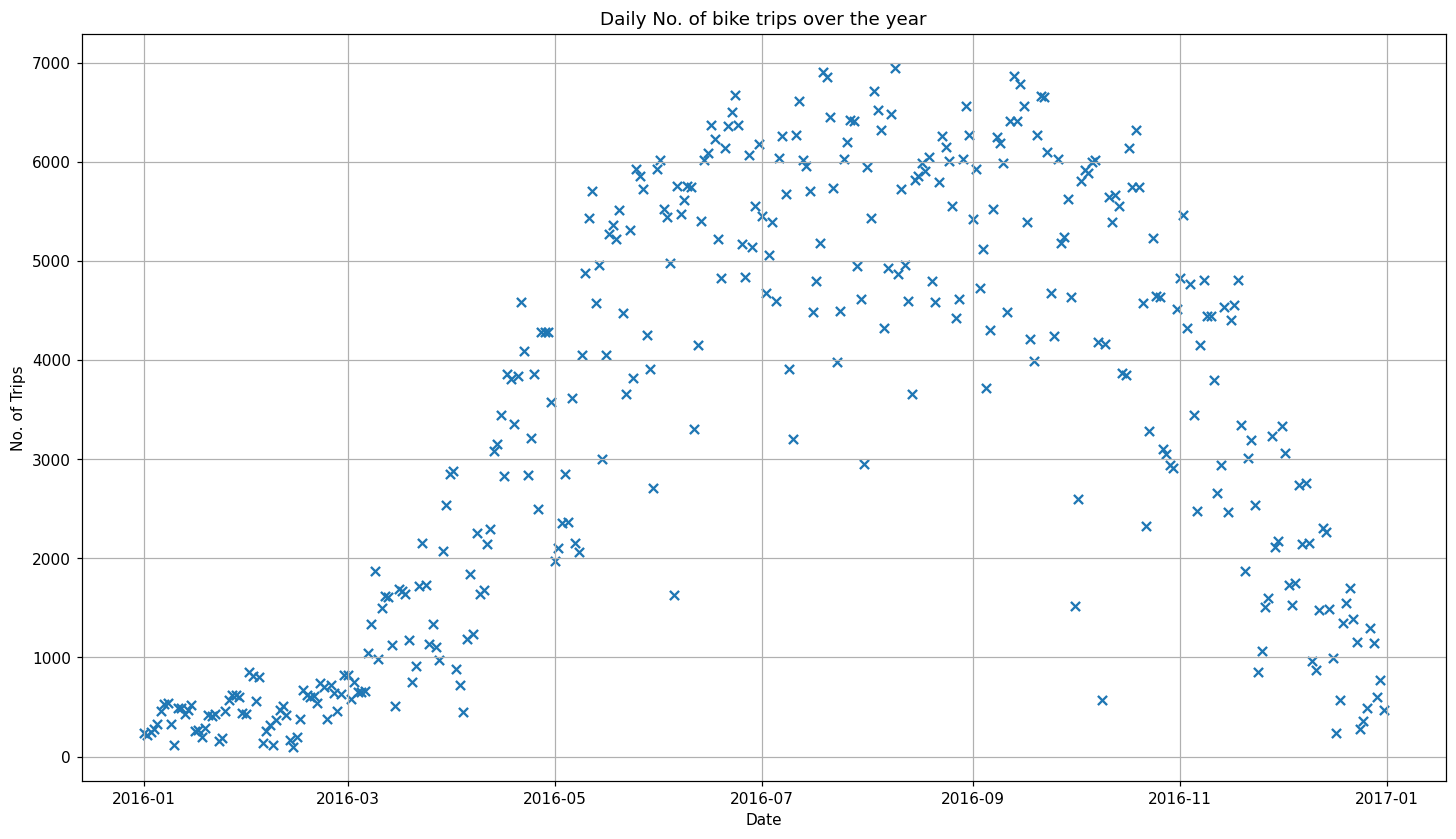

In [53]:
### dayly No. of bike trips over the year as scatter

bostonC_used = bostonC.groupby(["date"])["trip_id"].count()
#bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.scatter(bostonC_used.index, bostonC_used, marker="x")
plt.grid()
plt.title("Daily No. of bike trips over the year")
plt.xlabel("Date")
plt.ylabel("No. of Trips")
plt.show()

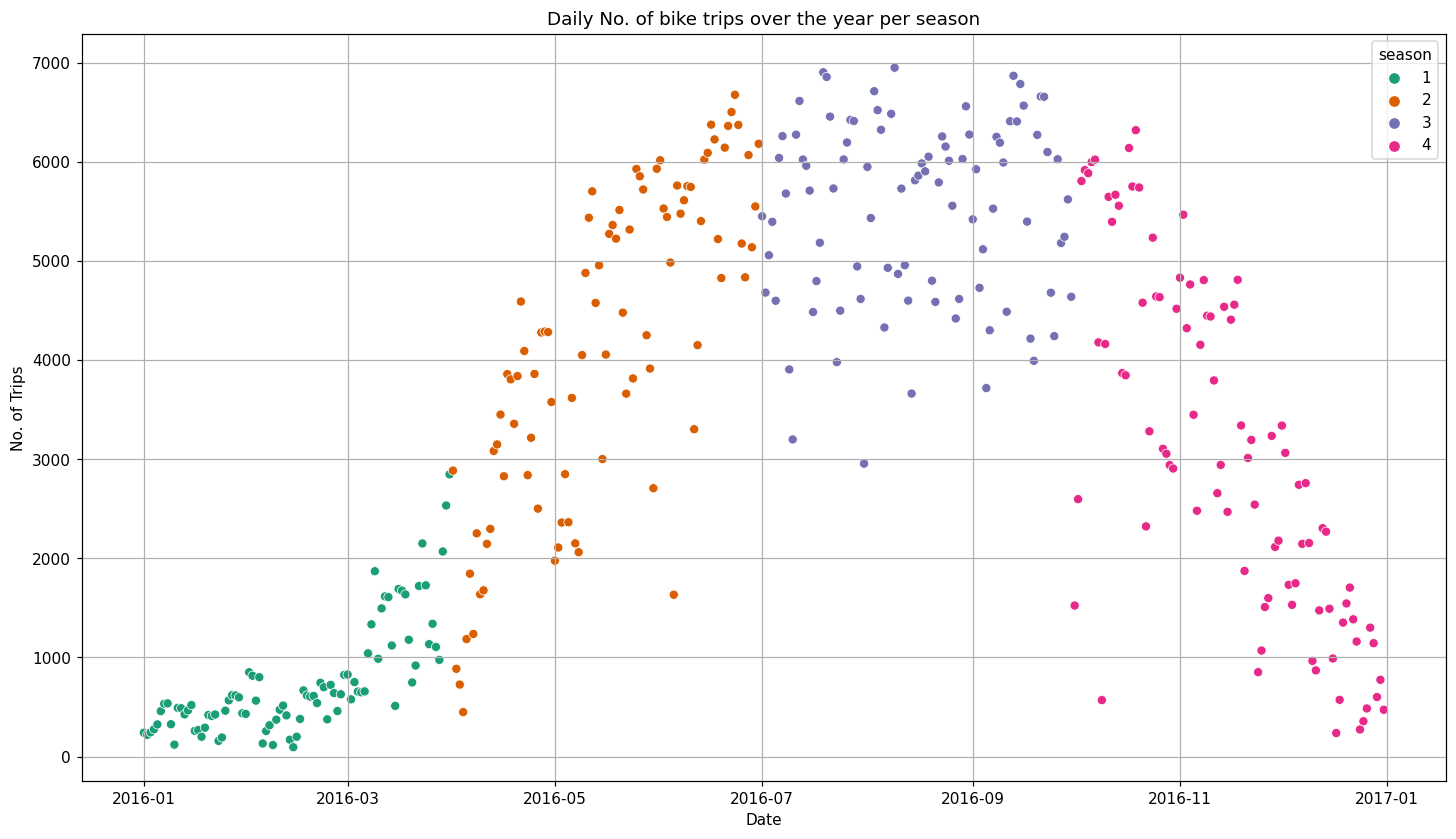

In [54]:
bostonC_used = bostonC.groupby(["date", "season"])["trip_id"].count()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.scatterplot(x=bostonC_used.index.get_level_values(0), y=bostonC_used["trip_id"], hue=bostonC_used.index.get_level_values(1),palette="Dark2")

plt.grid()
plt.title("Daily No. of bike trips over the year per season")
plt.xlabel("Date")
plt.ylabel("No. of Trips")
#plt.savefig("No.Bikes-season.pdf")
plt.show()

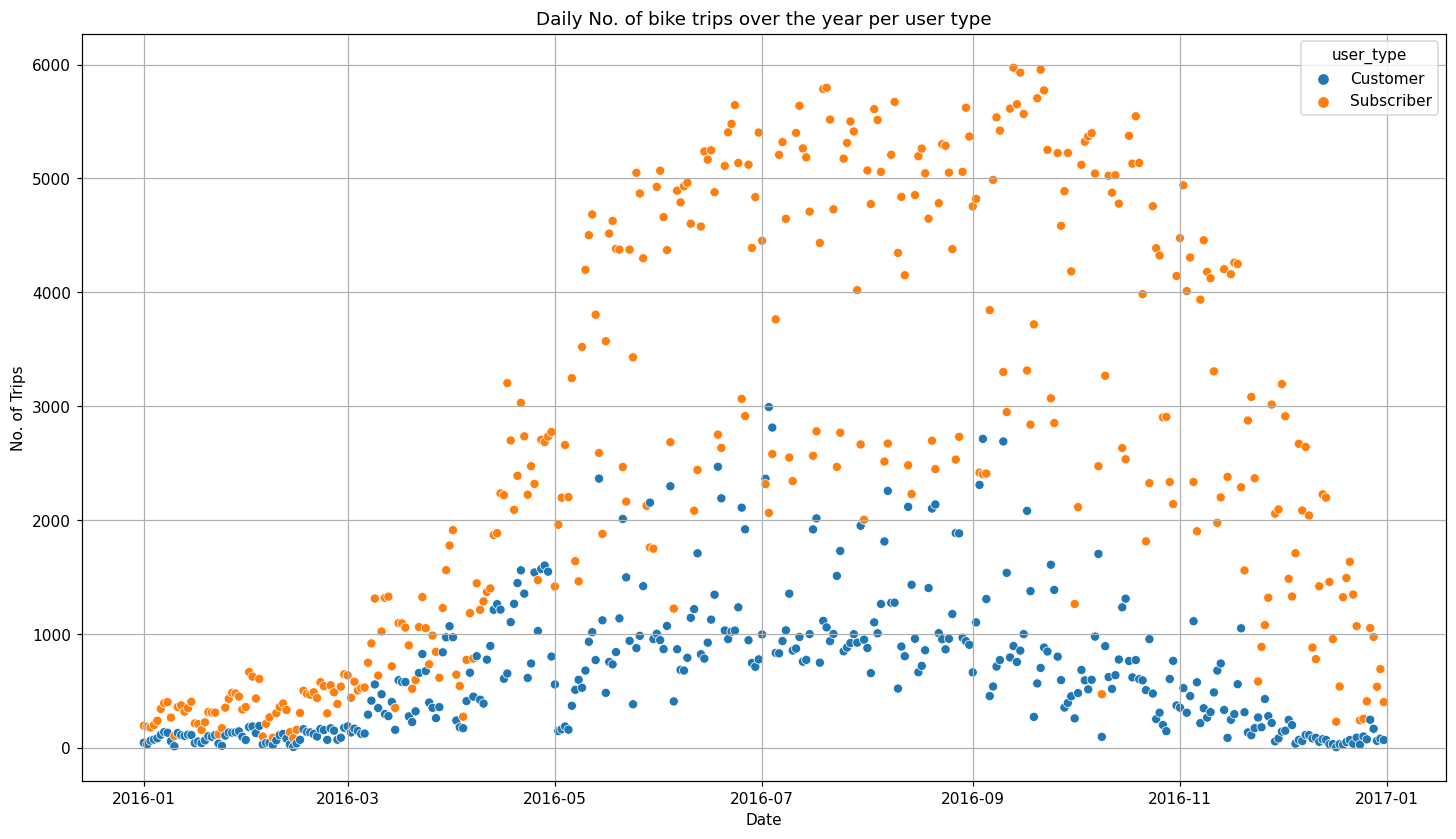

In [55]:
### dayly No. of bike trips over the year for each user type

bostonC_used = bostonC.groupby(["date", "user_type"])["trip_id"].count()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.scatterplot(x=bostonC_used.index.get_level_values(0), y=bostonC_used["trip_id"], hue=bostonC_used.index.get_level_values(1), ax=ax)
plt.grid()
plt.title("Daily No. of bike trips over the year per user type")
plt.xlabel("Date")
plt.ylabel("No. of Trips")
plt.show()

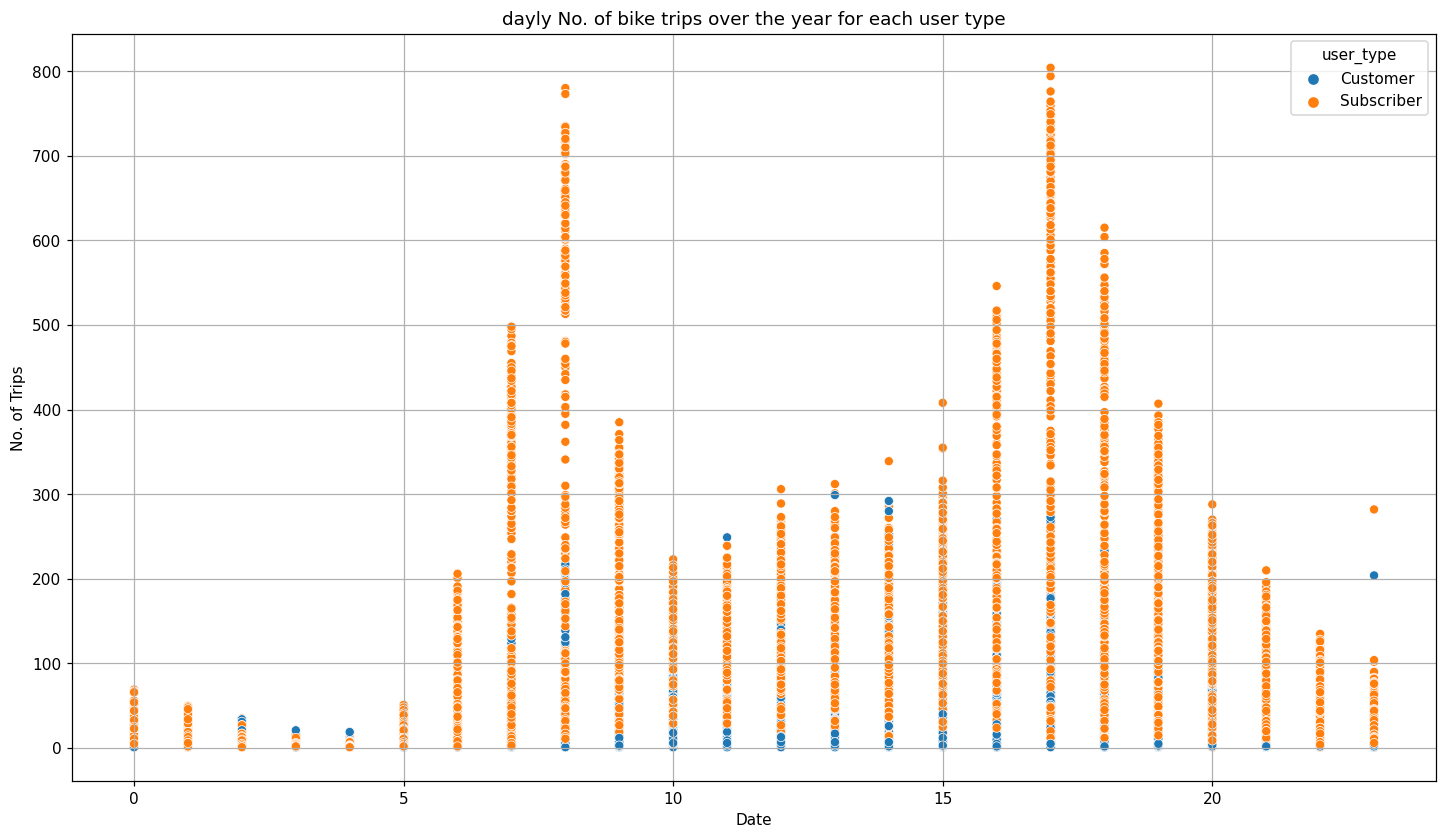

In [56]:
### dayly No. of bike trips over the year for each user type

bostonC_used = bostonC.groupby(["date", "hour", "user_type"])["trip_id"].count()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.scatterplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"], hue=bostonC_used.index.get_level_values(2), ax=ax)
plt.grid()
plt.title("dayly No. of bike trips over the year for each user type")
plt.xlabel("Date")
plt.ylabel("No. of Trips")
plt.show()

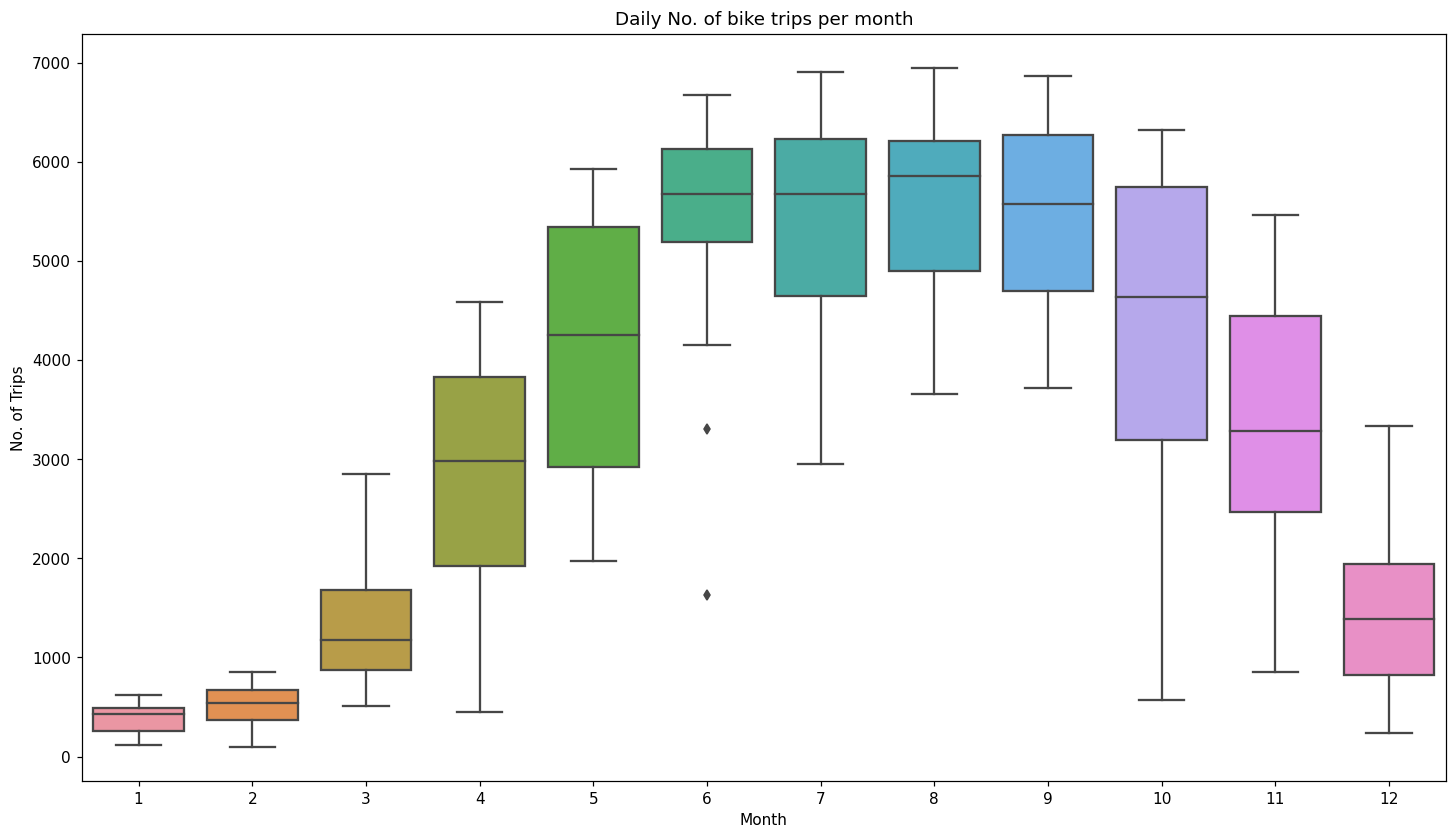

In [57]:
### dayly bikes trips per month

bostonC_used = bostonC.groupby(["date", "month"])["trip_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"],ax=ax)
plt.title("Daily No. of bike trips per month")
plt.xlabel("Month")
plt.ylabel("No. of Trips")
plt.show()


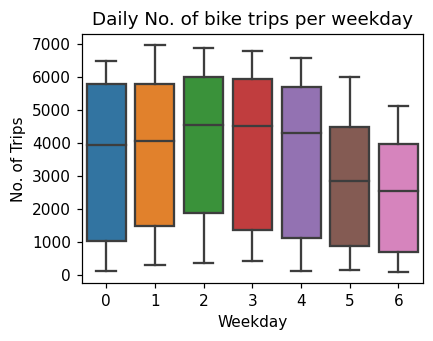

In [58]:
### dayly bikes trips per weekday

bostonC_used = bostonC.groupby(["date", "weekday"])["trip_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(4,3), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"],ax=ax)
plt.title("Daily No. of bike trips per weekday")
plt.xlabel("Weekday")
plt.ylabel("No. of Trips")
plt.show()

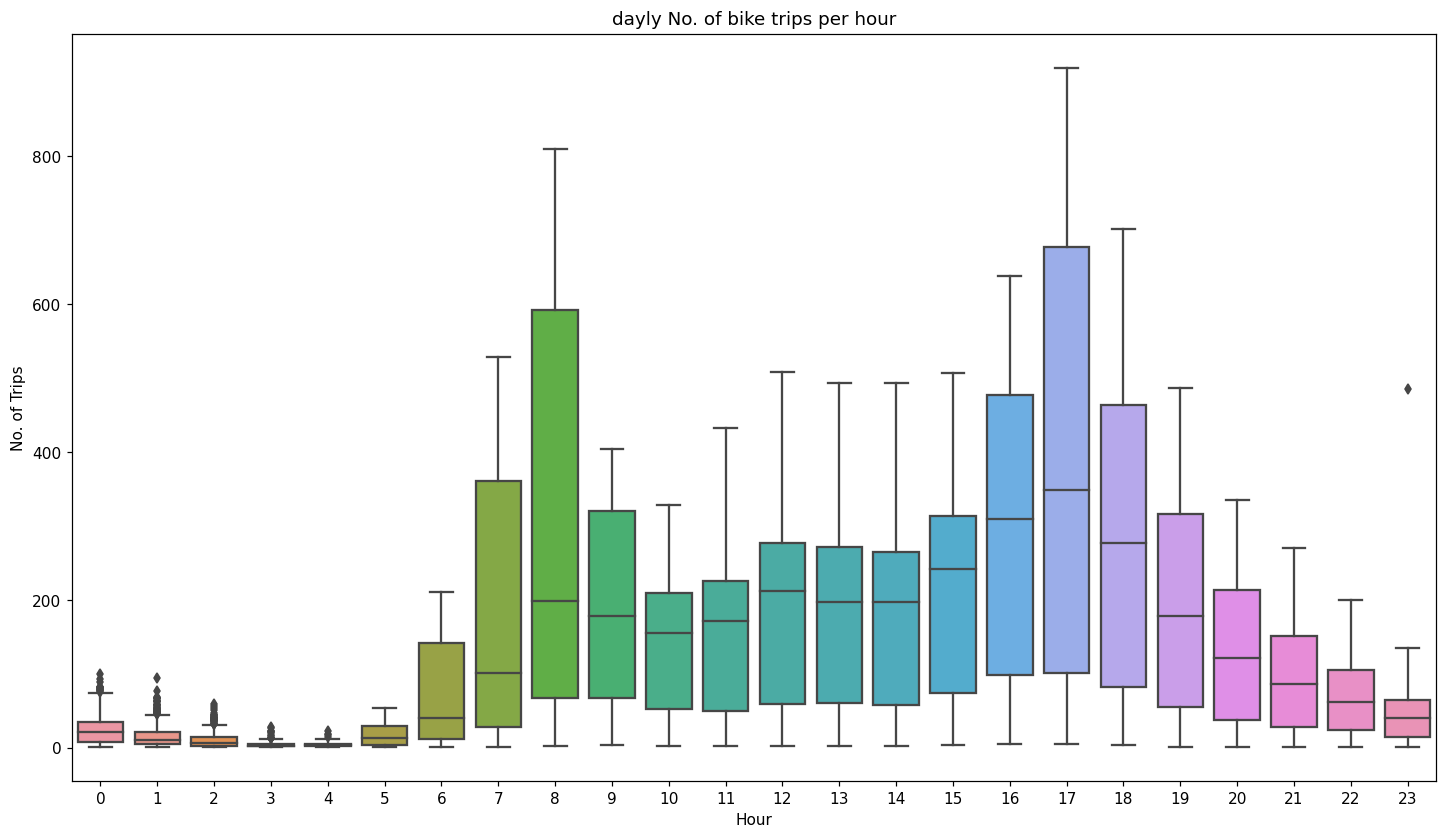

In [59]:
### dayly bike trips per hour

bostonC_used = bostonC.groupby(["date", "hour"])["trip_id"].count()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"],ax=ax)
plt.title("dayly No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("No. of Trips")
plt.show()

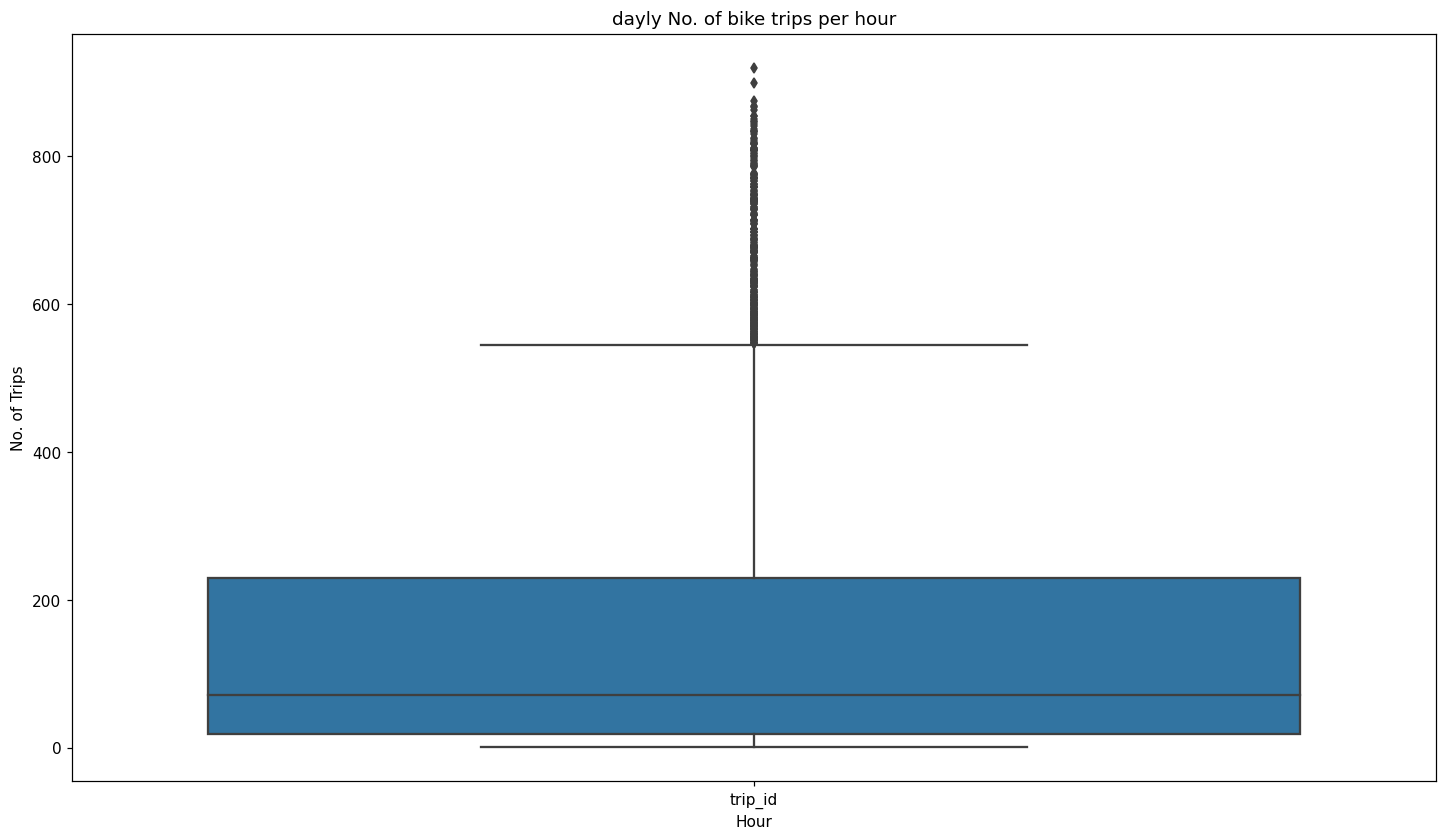

In [60]:
fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

#sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"], hue="user_type",   ax=ax) #hue=bostonC_used.index.get_level_values(2),
sns.boxplot(data=bostonC_used[['trip_id']]) #hue=bostonC_used.index.get_level_values(2),
#sns.despine(offset=10, trim=True)
plt.title("dayly No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("No. of Trips")
plt.show()

In [61]:
Q1 = bostonC_used.trip_id.quantile(0.25)
Q3 = bostonC_used.trip_id.quantile(0.75)
IQR = Q3 - Q1

In [62]:
((bostonC_used.trip_id < (Q1 - 1.5 * IQR)) | (bostonC_used.trip_id > (Q3 + 1.5 * IQR))).sum()

319

In [63]:
bostonC_used.trip_id.sum()

1235121

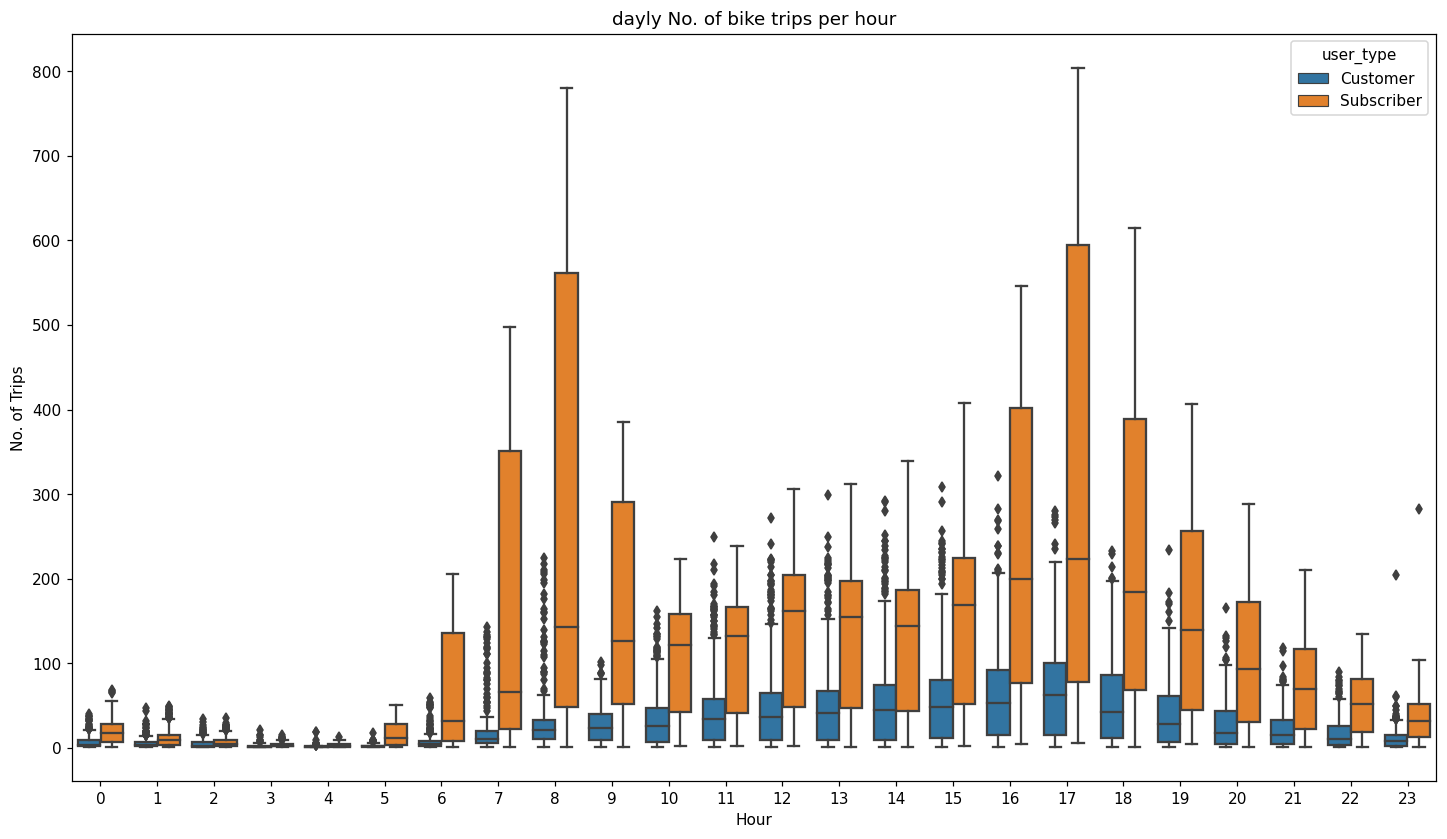

date  hour   user_type  trip_id
0     2016-01-01     0    Customer        1
1     2016-01-01     0  Subscriber       12
2     2016-01-01     1    Customer        4
3     2016-01-01     1  Subscriber       10
4     2016-01-01     2    Customer        1
...          ...   ...         ...      ...
16030 2016-12-31    21    Customer        2
16031 2016-12-31    21  Subscriber       20
16032 2016-12-31    22    Customer        2
16033 2016-12-31    22  Subscriber        4
16034 2016-12-31    23  Subscriber        6

[16035 rows x 4 columns]

In [64]:
### dayly bike trips per hour

bostonC_used = bostonC.groupby(["date", "hour", "user_type"], as_index=False)["trip_id"].count()
bostonC_used = pd.DataFrame(bostonC_used)
#bostonC_used["user_type"] = bostonC_used.user_type.astype("category")

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

#sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"], hue="user_type",   ax=ax) #hue=bostonC_used.index.get_level_values(2),
sns.boxplot(x=bostonC_used["hour"], y=bostonC_used["trip_id"], hue=bostonC_used["user_type"],   ax=ax) #hue=bostonC_used.index.get_level_values(2),
#sns.despine(offset=10, trim=True)
plt.title("dayly No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("No. of Trips")
plt.show()

bostonC_used


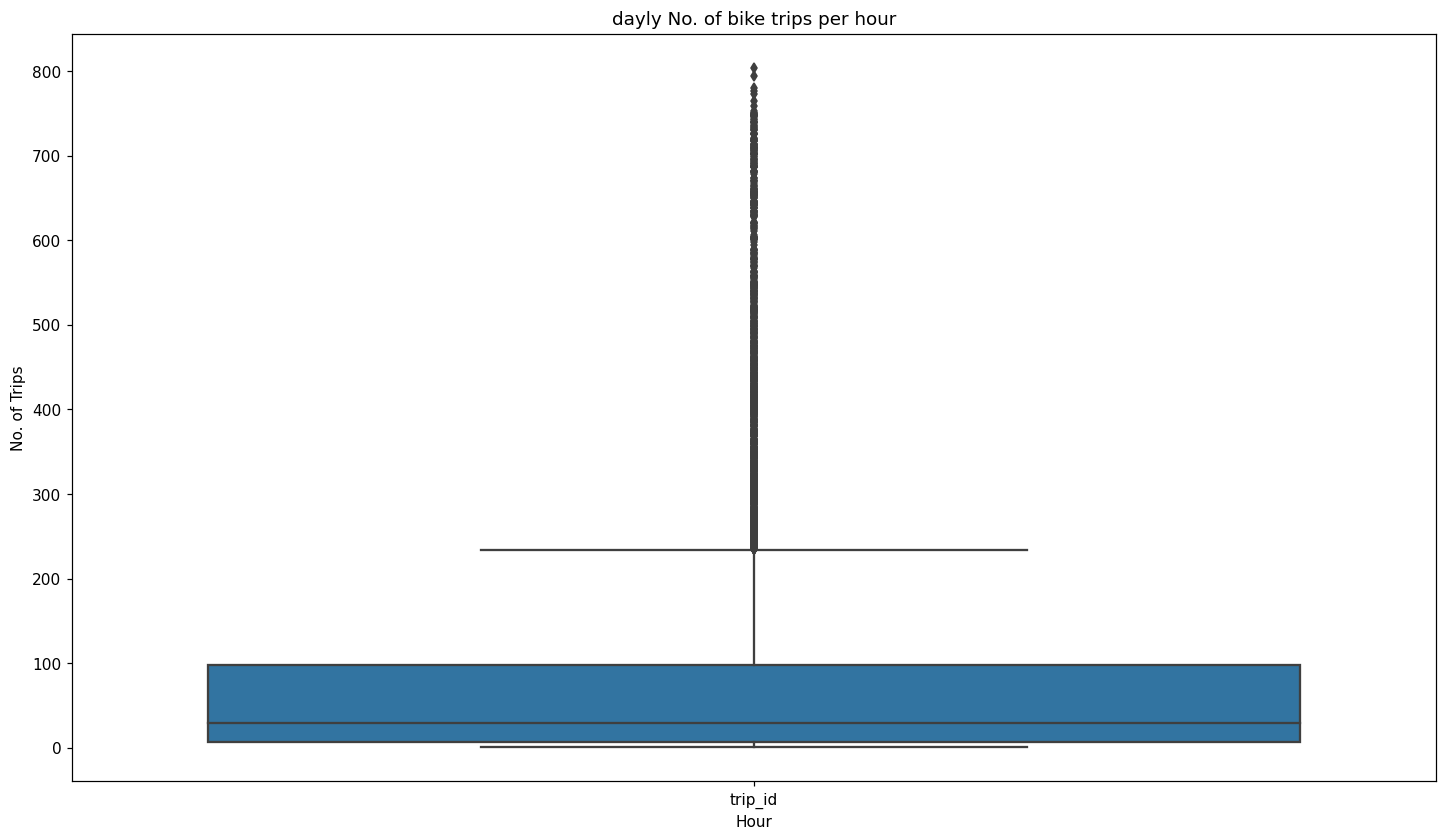

In [65]:
fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

#sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["trip_id"], hue="user_type",   ax=ax) #hue=bostonC_used.index.get_level_values(2),
sns.boxplot(data=bostonC_used[['trip_id']]) #hue=bostonC_used.index.get_level_values(2),
#sns.despine(offset=10, trim=True)
plt.title("dayly No. of bike trips per hour")
plt.xlabel("Hour")
plt.ylabel("No. of Trips")
plt.show()

In [66]:
Q1 = bostonC_used.trip_id.quantile(0.25)
Q3 = bostonC_used.trip_id.quantile(0.75)
IQR = Q3 - Q1

In [67]:
((bostonC_used.trip_id < (Q1 - 1.5 * IQR)) | (bostonC_used.trip_id > (Q3 + 1.5 * IQR))).sum()

1188

In [68]:
bostonC_used.trip_id.sum()

1235121

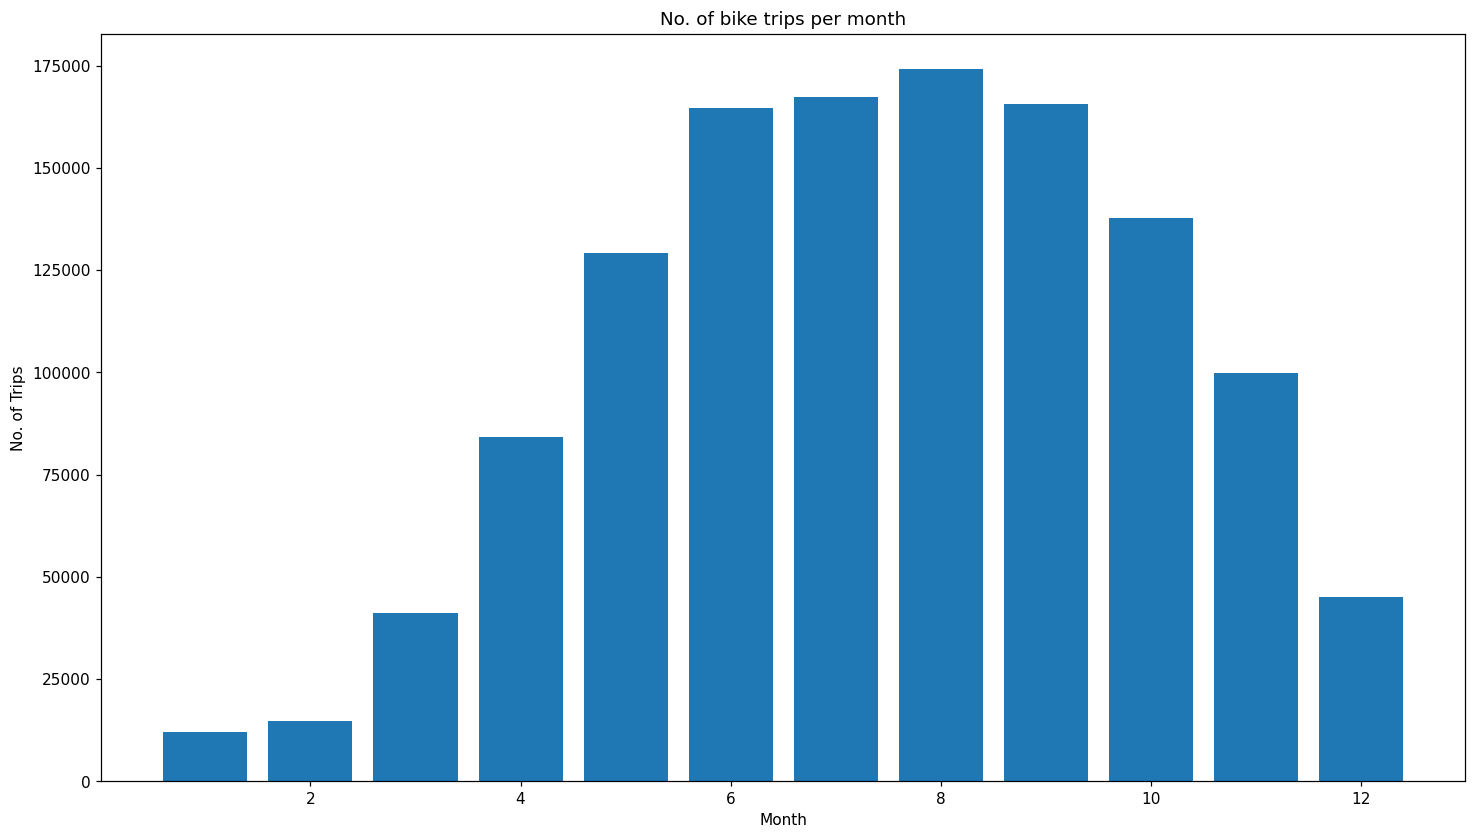

In [69]:
### No. of bike trips per month, 1 = Jan., 12 = Dec.

bostonC_used = bostonC.groupby(["month"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.title("No. of bike trips per month")
plt.xlabel("Month")
plt.ylabel("No. of Trips")
plt.show()

In [70]:
bostonC["month"].value_counts()

8     174092
7     167281
9     165597
6     164553
10    137790
5     129080
11     99845
4      84113
12     44951
3      41158
2      14623
1      12038
Name: month, dtype: int64

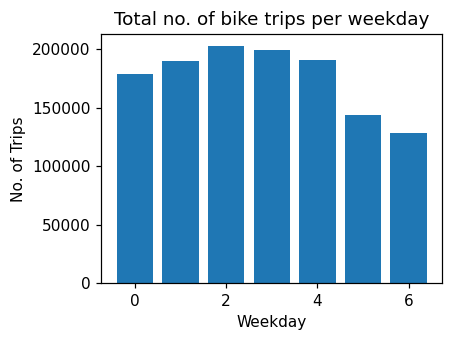

In [71]:
### No. of trips per weekday (0 = Monday, 6 = Sunday)

bostonC_used = bostonC.groupby(["weekday"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(4,3), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.title("Total no. of bike trips per weekday")
plt.xlabel("Weekday")
plt.ylabel("No. of Trips")
plt.show()

In [72]:
bostonC["weekday"].value_counts()

2    202905
3    199816
4    190813
1    190235
0    179028
5    144045
6    128279
Name: weekday, dtype: int64

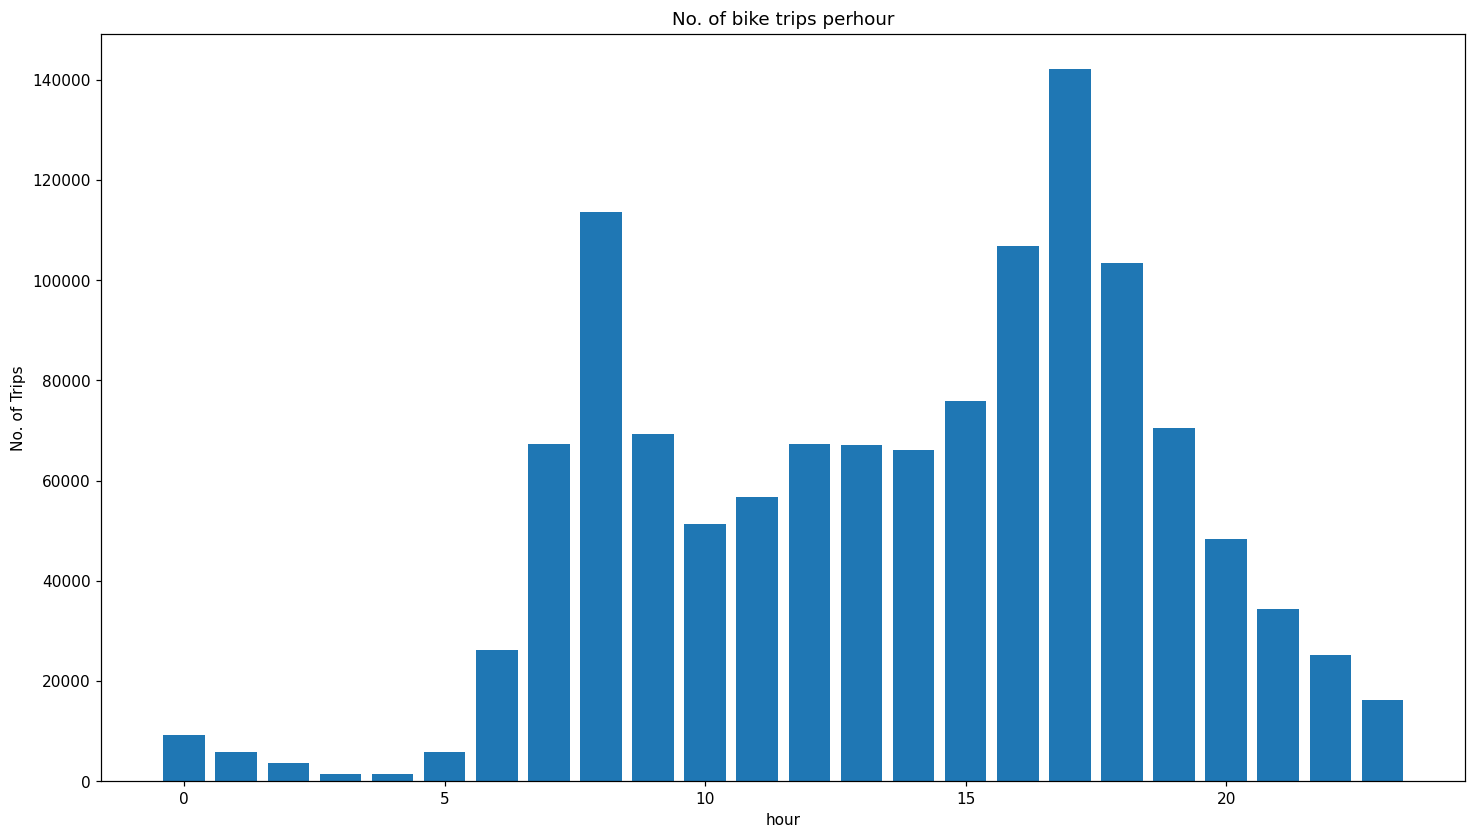

In [73]:
### No. of trips per hour 

bostonC_used = bostonC.groupby(["hour"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.title("No. of bike trips perhour")
plt.xlabel("hour")
plt.ylabel("No. of Trips")
plt.show()

In [74]:
bostonC["hour"].value_counts()

17    142069
8     113589
16    106857
18    103373
15     75966
19     70553
9      69307
7      67316
12     67298
13     67166
14     66003
11     56706
10     51275
20     48314
21     34431
6      26118
22     25172
23     16234
0       9240
1       5894
5       5825
2       3636
3       1442
4       1337
Name: hour, dtype: int64

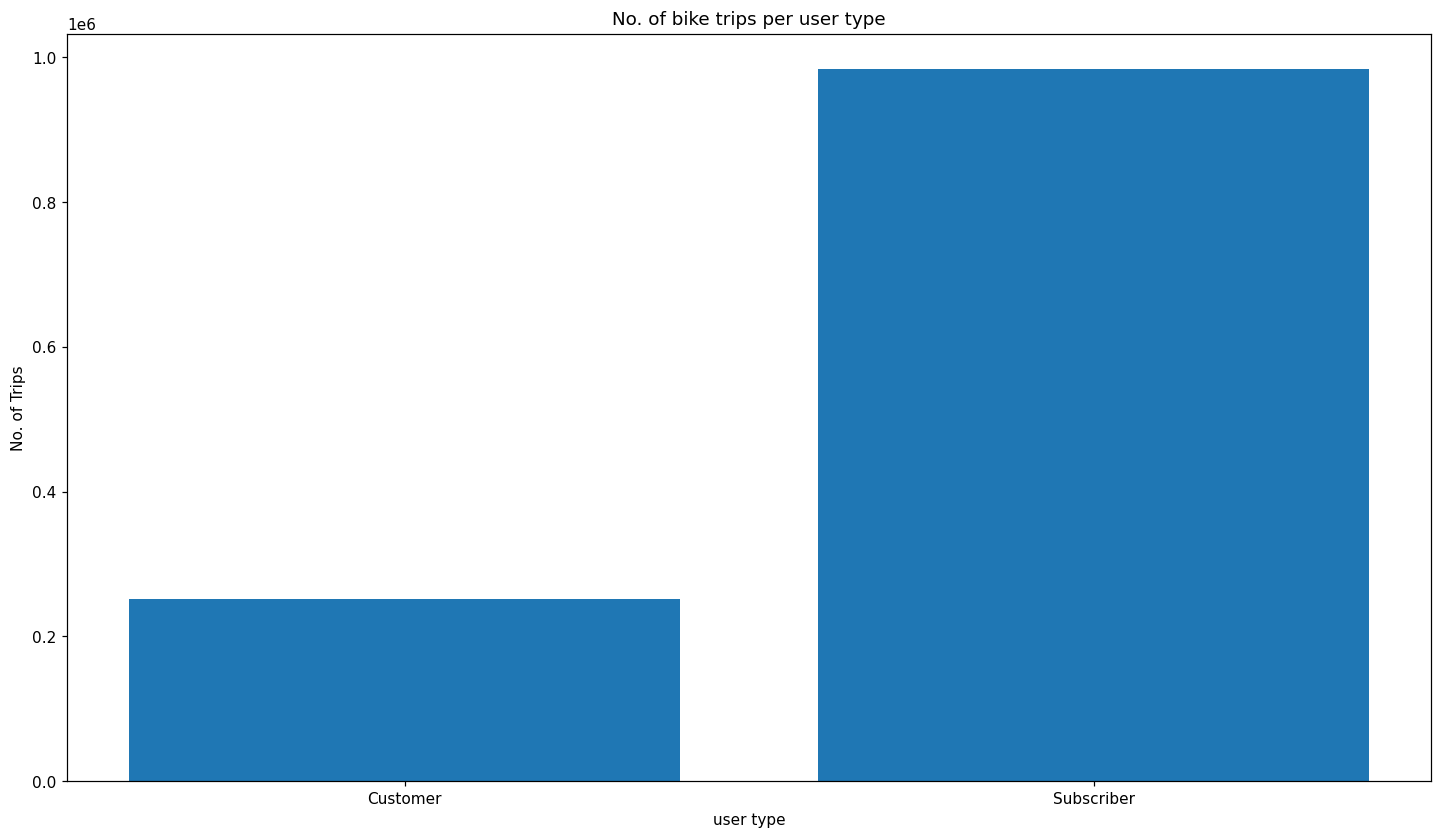

In [75]:
### No. of bike trips of each user type over the year 
bostonC_used = bostonC.groupby(["user_type"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.bar(bostonC_used.index, bostonC_used)

plt.title("No. of bike trips per user type")
plt.xlabel("user type")
plt.ylabel("No. of Trips")
plt.show()

In [76]:
bostonC["user_type"].value_counts()

Subscriber    983412
Customer      251709
Name: user_type, dtype: int64

###
bike fleet usage analysis

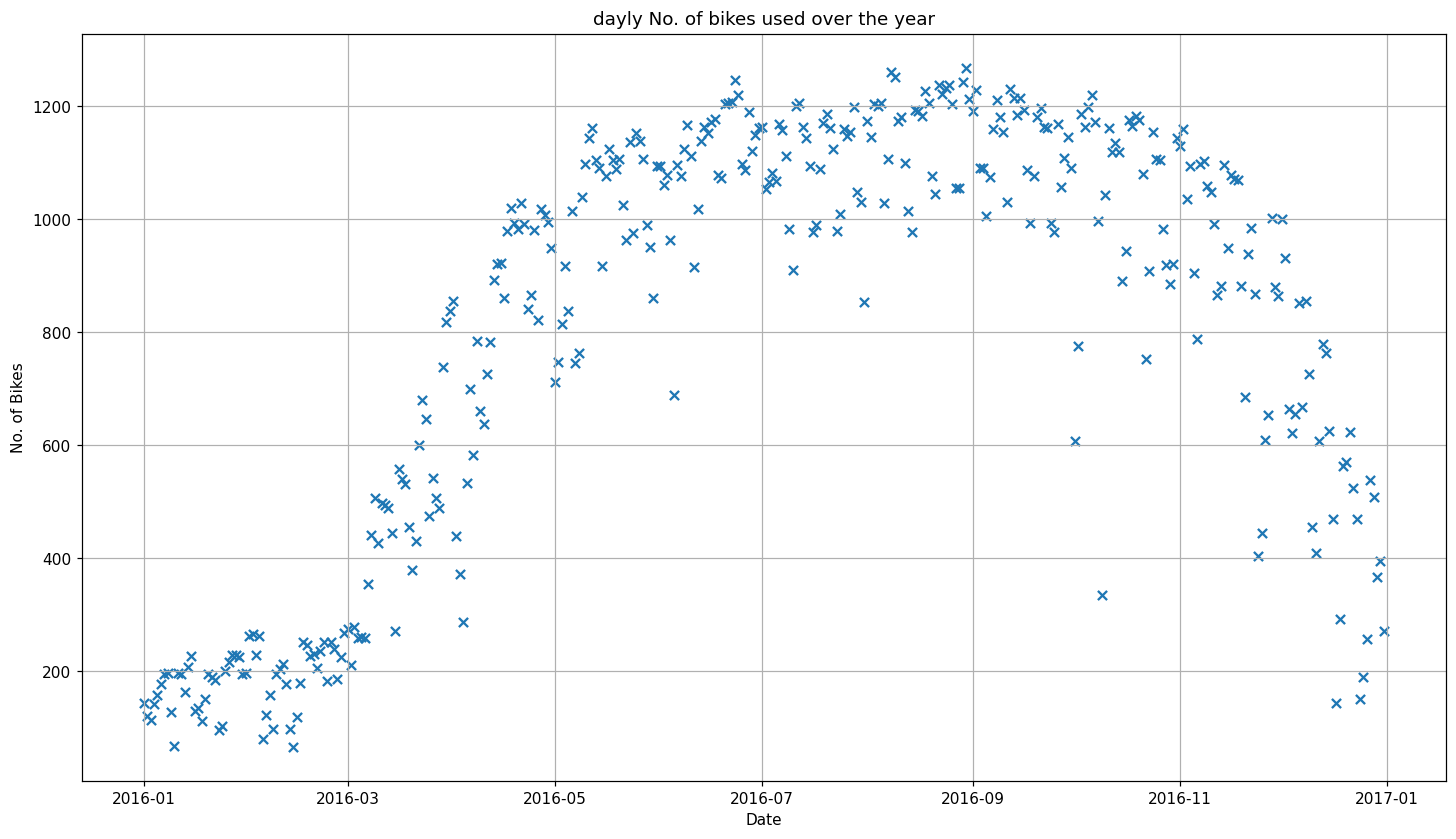

In [77]:
### dayly No. of bikes used over the year

bostonC_used = bostonC.groupby(["date"])["bike_id"].nunique()
#bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

ax.scatter(bostonC_used.index, bostonC_used, marker="x")
plt.grid()
plt.title("dayly No. of bikes used over the year")
plt.xlabel("Date")
plt.ylabel("No. of Bikes")
plt.show()

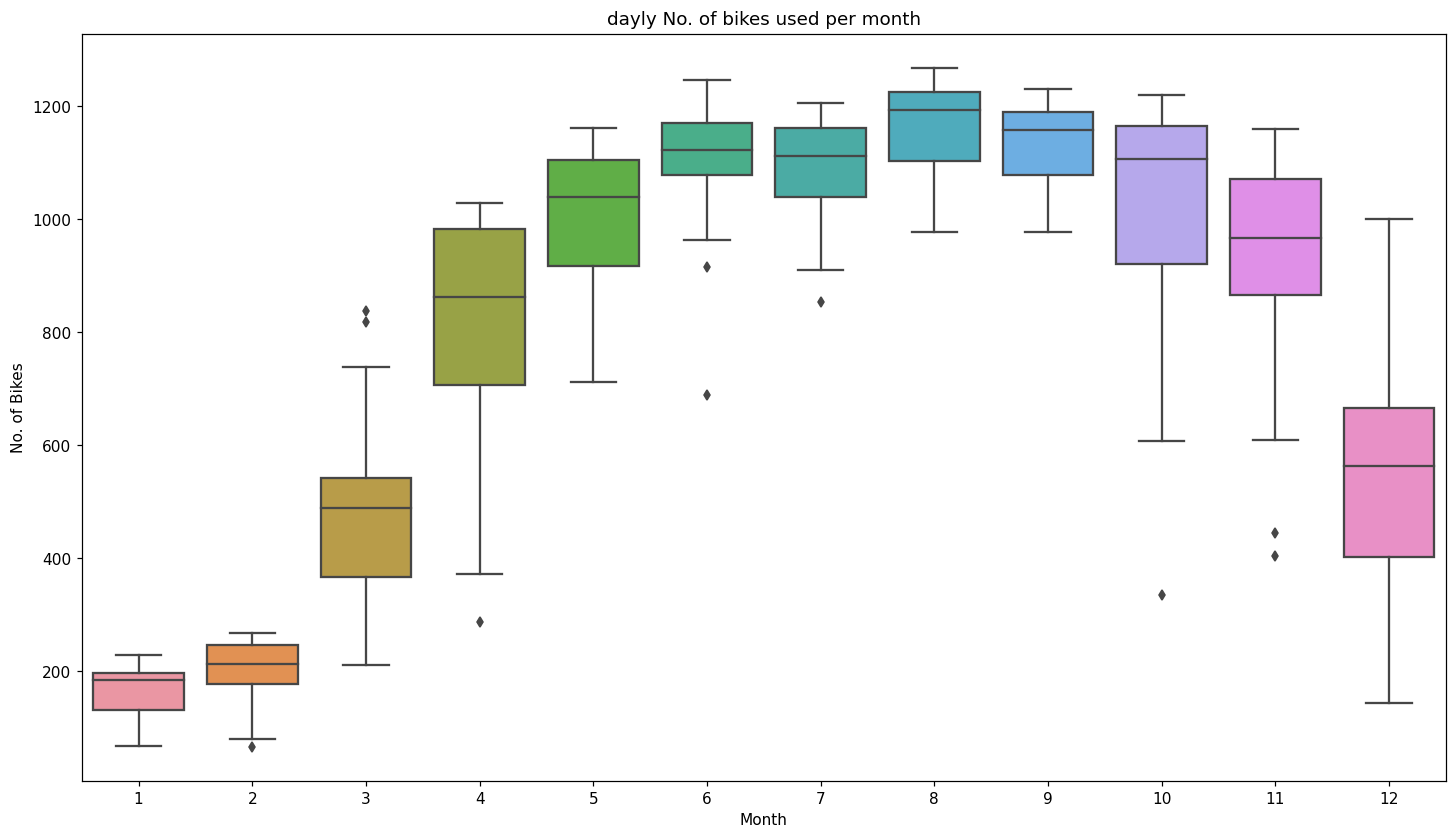

In [78]:
### dayly bikes used per month

bostonC_used = bostonC.groupby(["date", "month"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.title("dayly No. of bikes used per month")
plt.xlabel("Month")
plt.ylabel("No. of Bikes")
plt.show()

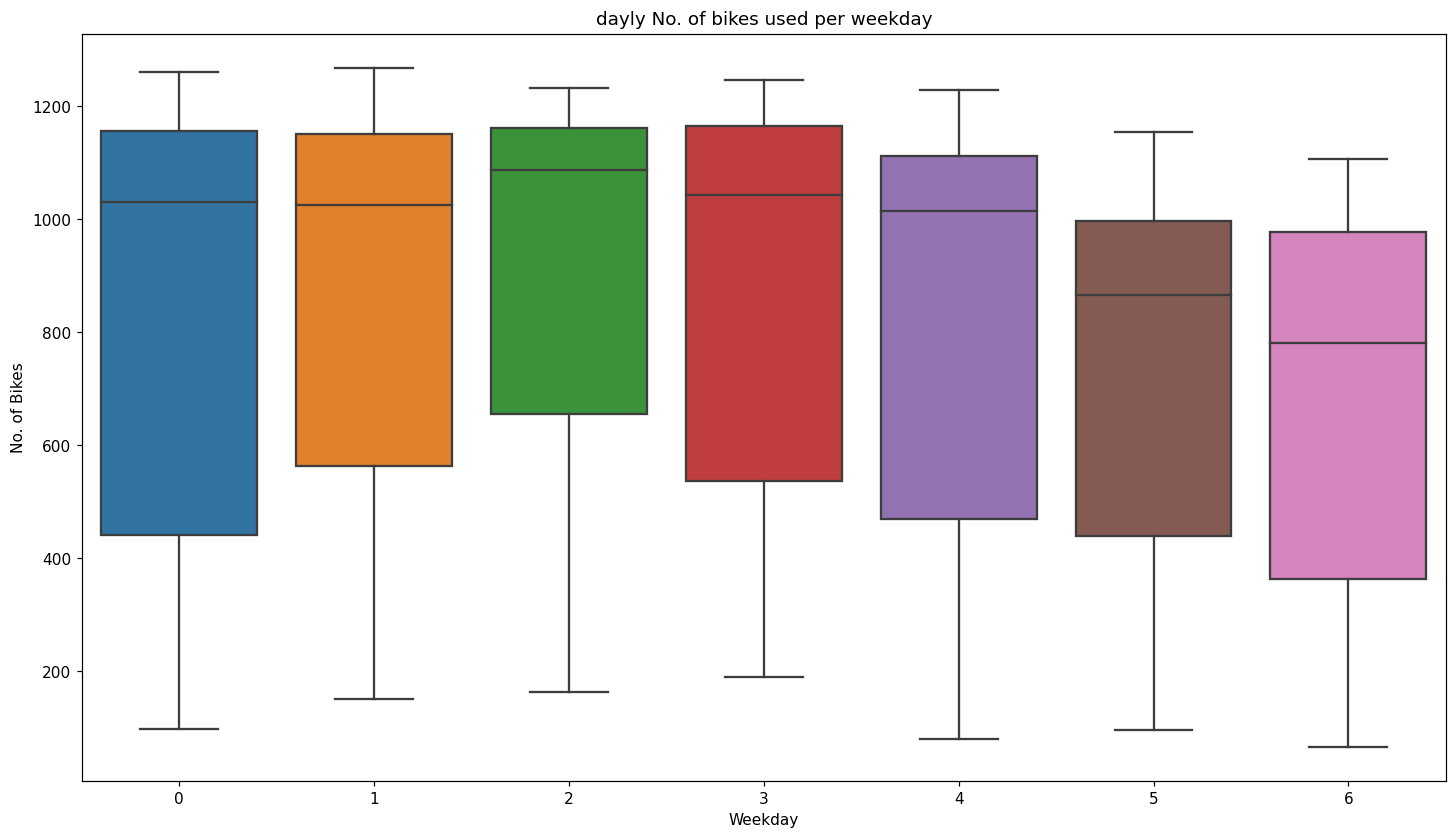

In [79]:
### dayly bikes used per weekday

bostonC_used = bostonC.groupby(["date", "weekday"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.title("dayly No. of bikes used per weekday")
plt.xlabel("Weekday")
plt.ylabel("No. of Bikes")
plt.show()

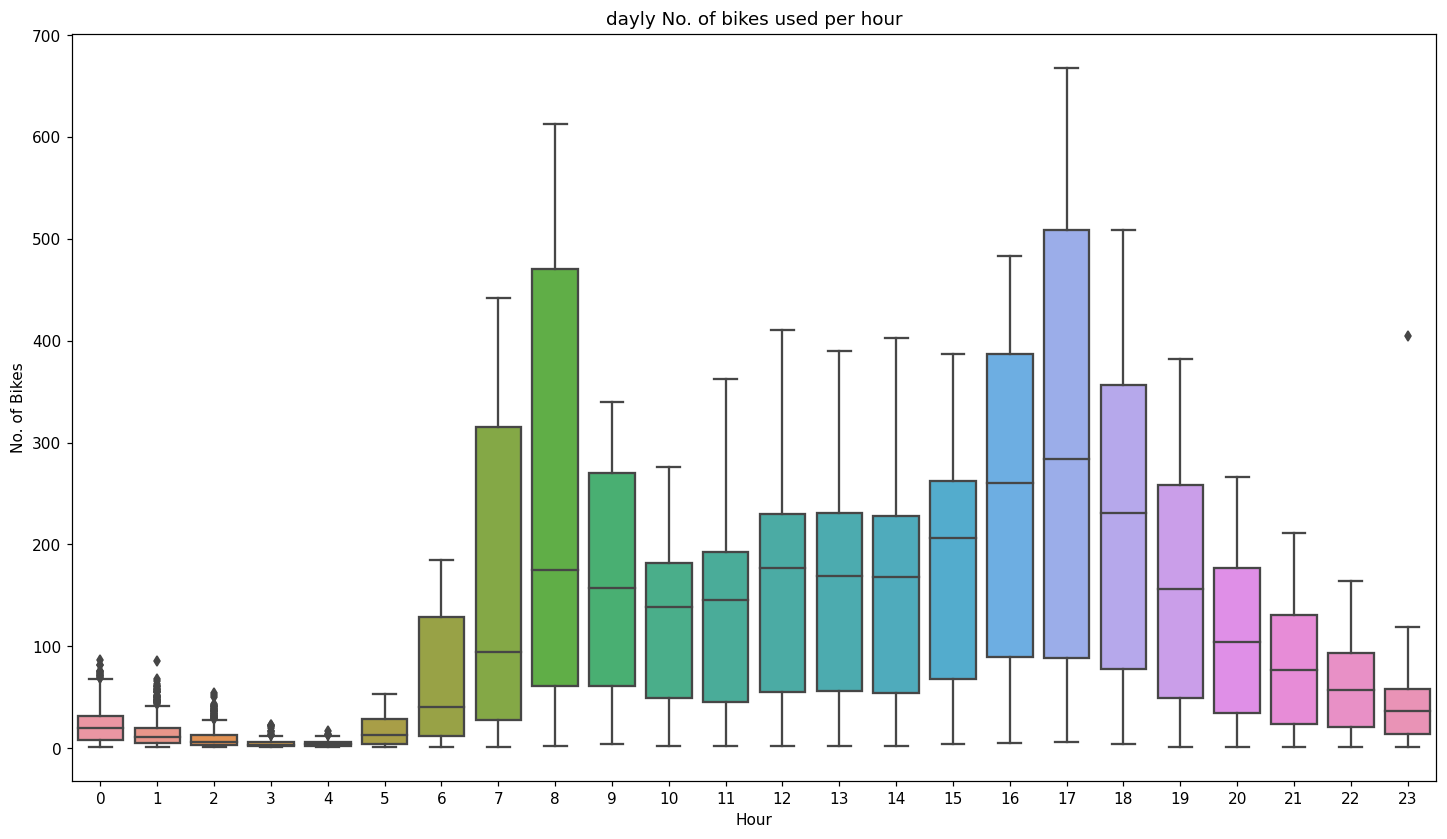

In [80]:
### bikes used per hour

bostonC_used = bostonC.groupby(["date", "hour"])["bike_id"].nunique()
bostonC_used = pd.DataFrame(bostonC_used)

fig,ax = plt.subplots(figsize=(16,9), dpi=110) 

sns.boxplot(x=bostonC_used.index.get_level_values(1), y=bostonC_used["bike_id"],ax=ax)
plt.title("dayly No. of bikes used per hour")
plt.xlabel("Hour")
plt.ylabel("No. of Bikes")
plt.show()

### Geographical Demand Patterns
Station analysis

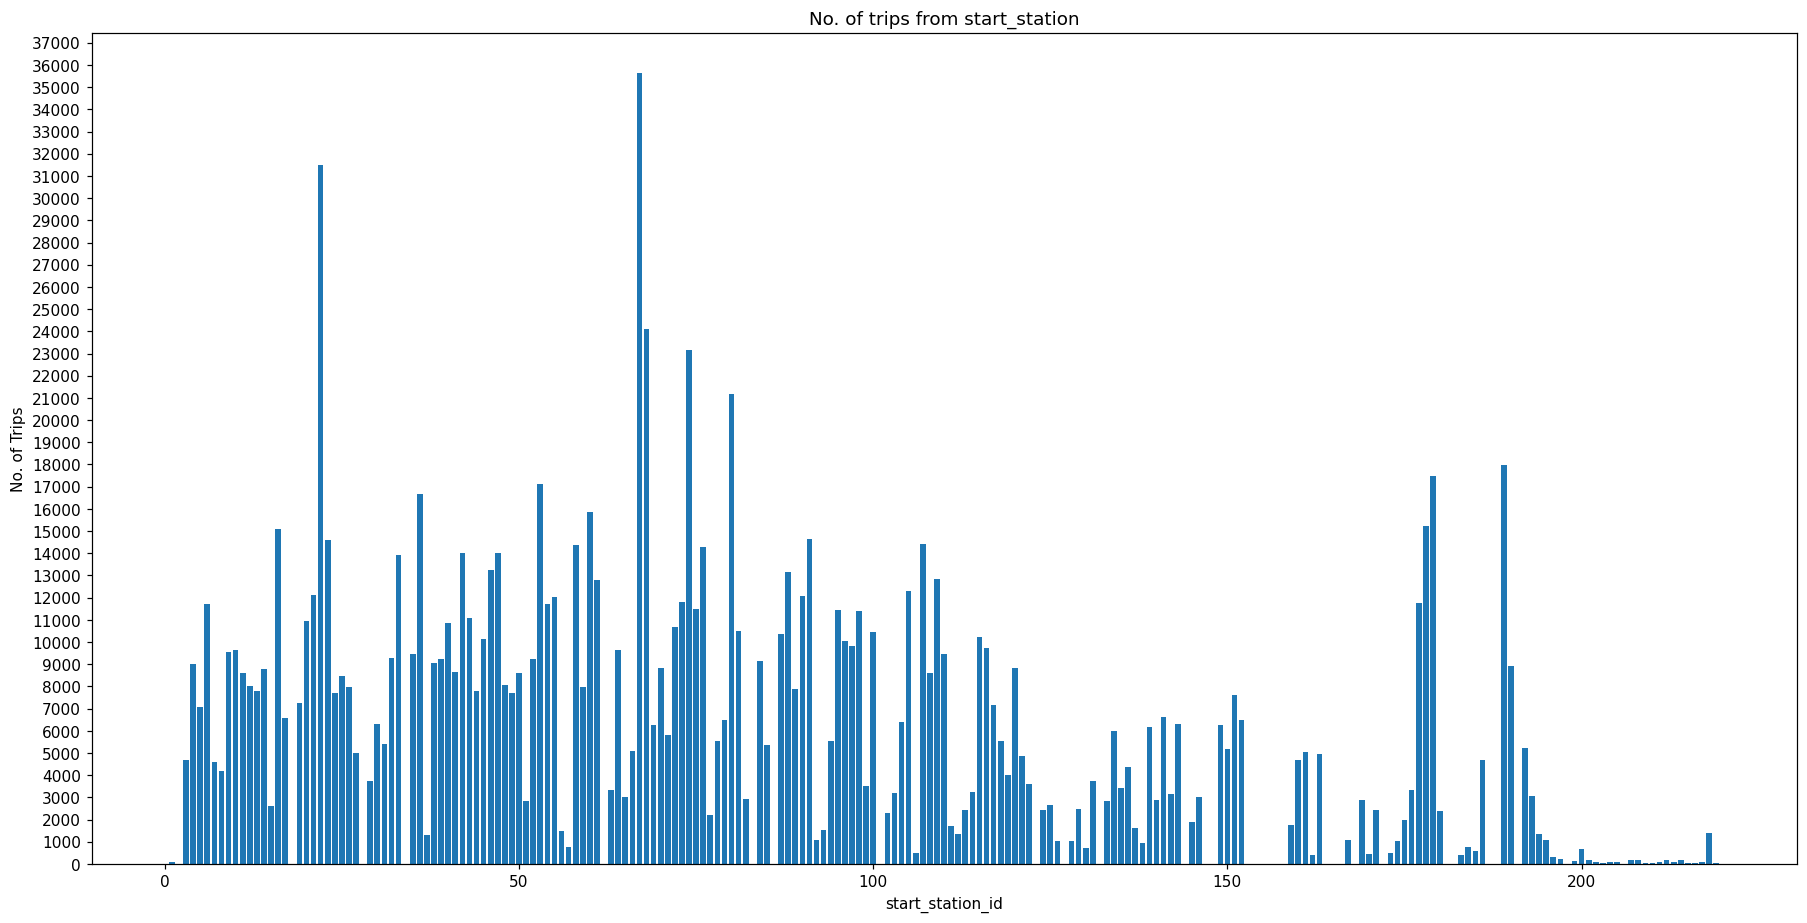

In [81]:
### No. of trips from start_station
bostonS = bostonC.groupby(["start_station_id"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(20,10), dpi=110) 

ax.bar(bostonS.index, bostonS)
ax.set_yticks(range(0,38000,1000))
#ax.set_xticks(range(0,220,1))
plt.title("No. of trips from start_station")
plt.xlabel("start_station_id")
plt.ylabel("No. of Trips")

plt.show()

In [82]:
bostonC["start_station_id"].value_counts()

67     35638
22     31507
68     24106
74     23159
80     21175
       ...  
216       43
209       31
219       23
153        2
158        1
Name: start_station_id, Length: 189, dtype: int64

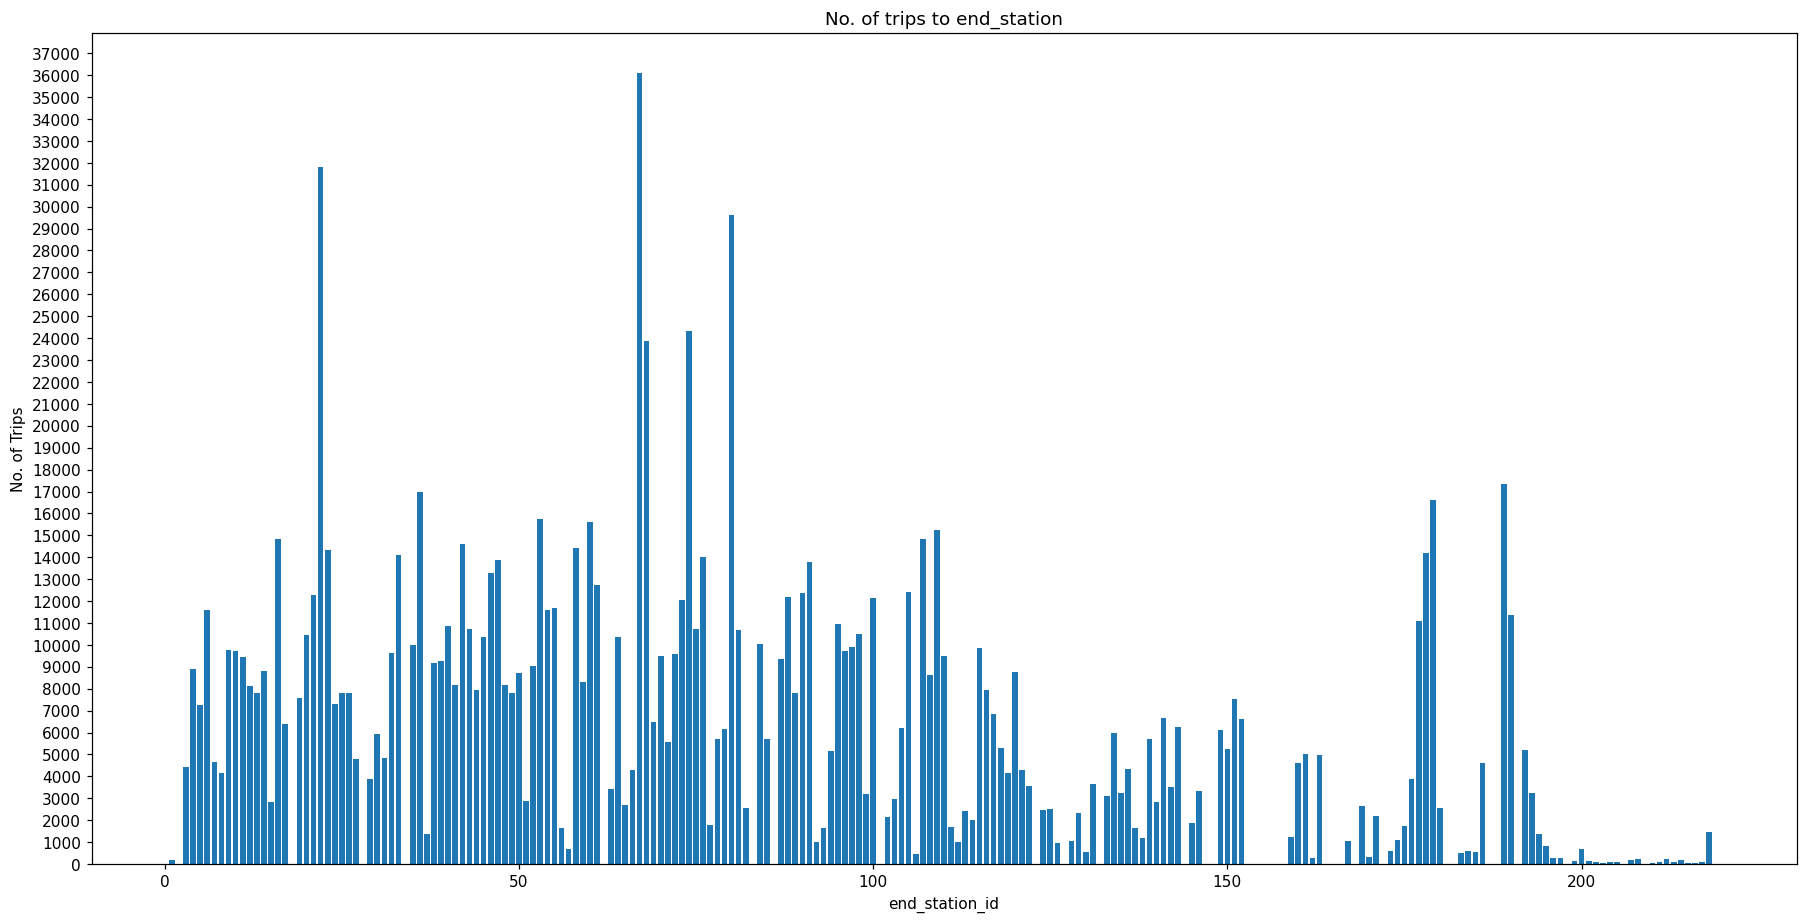

In [83]:
### No. of trips to end_station
bostonS = bostonC.groupby(["end_station_id"])["trip_id"].nunique()

fig,ax = plt.subplots(figsize=(20,10), dpi=110) 

ax.bar(bostonS.index, bostonS)
ax.set_yticks(range(0,38000,1000))
#ax.set_xticks(range(0,220,1))
plt.title("No. of trips to end_station")
plt.xlabel("end_station_id")
plt.ylabel("No. of Trips")

plt.show()

In [84]:
bostonC["end_station_id"].value_counts()

67     36099
22     31800
80     29628
74     24335
68     23858
       ...  
215       36
209       21
219       12
153        2
158        1
Name: end_station_id, Length: 189, dtype: int64

In [85]:
### No. of Trips with same start and end station id
len(bostonC.loc[bostonC.start_station_id == bostonC.end_station_id])

38533

###
### not much data for geographical analytics in the data set, maybe try to find the station coordinates in the historical data from the bluebikes website

###
### Key Performance Indicators (KPIs)

##### Fleet Utilization

The fleet utilization

Determine the fleet size

In [86]:
### fleet size
bikes = bostonC["bike_id"].nunique()
print(bikes)

1802


According to the blue bikes website (https://www.bluebikes.com/system-data) the fleet had 1500 Bikes in the beginning of 2016 and 1800 at the end of 2016

As we dont know when exactly the fleet grow up to 1800 Bikes, we calculate the fleet utilization for all day of 2016 with the No. of Bikes at the end of 2016

Calculate hourly fleet utilization data

In [87]:
### hourly fleet Utilization in No. of Bikes and %

bostonP = bostonC.groupby(["date", "hour"])
bostonPc = pd.DataFrame(bostonP.size(), columns=["bike_id"])
bostonPc["fleet_util"] = bostonPc["bike_id"] /bikes *100
print(bostonPc)

                 bike_id  fleet_util
date       hour                     
2016-01-01 0          13    0.721421
           1          14    0.776915
           2           9    0.499445
           3           1    0.055494
           6           1    0.055494
...                  ...         ...
2016-12-31 19         20    1.109878
           20         13    0.721421
           21         22    1.220866
           22          6    0.332963
           23          6    0.332963

[8548 rows x 2 columns]


In [88]:
bostonPc.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8548 entries, (Timestamp('2016-01-01 00:00:00'), 0) to (Timestamp('2016-12-31 00:00:00'), 23)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_id     8548 non-null   int64  
 1   fleet_util  8548 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 161.8 KB


merge Timestamp and hour into a single index

In [89]:
fleet_util = bostonPc
fleet_util.index = pd.to_datetime(fleet_util.index.get_level_values(0).astype(str) + '-' +
               fleet_util.index.get_level_values(1).astype(str),
               format="%Y-%m-%d-%H")

In [90]:
fleet_util

bike_id  fleet_util
2016-01-01 00:00:00       13    0.721421
2016-01-01 01:00:00       14    0.776915
2016-01-01 02:00:00        9    0.499445
2016-01-01 03:00:00        1    0.055494
2016-01-01 06:00:00        1    0.055494
...                      ...         ...
2016-12-31 19:00:00       20    1.109878
2016-12-31 20:00:00       13    0.721421
2016-12-31 21:00:00       22    1.220866
2016-12-31 22:00:00        6    0.332963
2016-12-31 23:00:00        6    0.332963

[8548 rows x 2 columns]

##### visualize the fleet utilization data 

plotly with range slider, use right slider to select a time point, then click 2d and hover over the plot for data (date, hour, fleet uitl. in %)

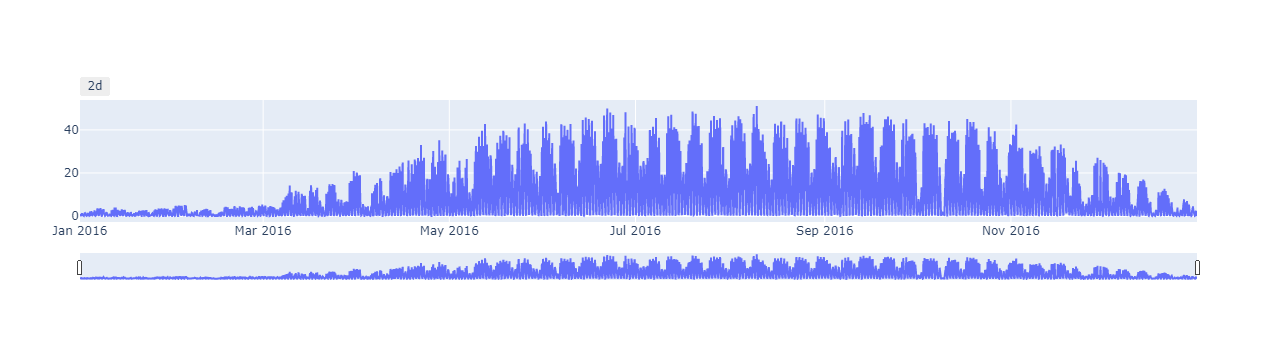

In [91]:
x =  fleet_util.index.get_level_values(0) 
y = fleet_util['fleet_util']

plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='lines',)
])

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=2,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
  
plot.show()

### source: https://www.geeksforgeeks.org/how-to-make-range-slider-and-selector-in-plotly/

In [92]:
fleet_util.describe()

bike_id   fleet_util
count  8548.000000  8548.000000
mean    144.492396     8.018446
std     167.672471     9.304799
min       1.000000     0.055494
25%      18.000000     0.998890
50%      71.000000     3.940067
75%     229.000000    12.708102
max     920.000000    51.054384

The fleet utilization usually peaks at 5pm and 8am, so usually around the times when people go to work/school and go back home

As we used the total fleet size of 1802 Bikes for calculating the fleet utilization, because we dont have information/data about how many bikes of the fleet were available for the users at what timepoint,
the max utilization of 51% seems a bit low


In [93]:
#stop execution 
    
#raise SystemExit("Stop right there!")

In [94]:
## hourly fleet Utilization in No. of Bikes and %

bostonU = bostonC
bostonU["IsSubscriber"] = bostonU["user_type"].apply(lambda x: 1 if x=="Subscriber" else 0)
bostonU["IsCustomer"] = bostonU["user_type"].apply(lambda x: 1 if x=="Customer" else 0)

bostonU

start_time            end_time  start_station_id  \
0       2016-01-01 00:08:07 2016-01-01 00:40:26                36   
1       2016-01-01 00:08:19 2016-01-01 00:40:27                36   
2       2016-01-01 00:10:15 2016-01-01 00:40:29                36   
3       2016-01-01 00:10:22 2016-01-01 00:40:11                36   
4       2016-01-01 00:15:36 2016-01-01 00:31:17                36   
...                     ...                 ...               ...   
1235116 2016-12-31 23:01:46 2016-12-31 23:14:20                 8   
1235117 2016-12-31 23:14:21 2016-12-31 23:18:03               190   
1235118 2016-12-31 23:15:38 2016-12-31 23:24:43                33   
1235119 2016-12-31 23:20:35 2016-12-31 23:27:58                90   
1235120 2016-12-31 23:34:18 2016-12-31 23:42:20                80   

         end_station_id                           start_station_name  \
0                    19     Boston Public Library - 700 Boylston St.   
1                    19     Boston Public Library - 700 Boylston St.   
2                    19     Boston Public Library - 700 Boylston St.   
3                    19     Boston Public Library - 700 Boylston St.   
4                    67     Boston Public Library - 700 Boylston St.   
...                 ...                                          ...   
1235116              33  Union Square - Brighton Ave at Cambridge St   
1235117               6            Nashua Street at Red Auerbach Way   
1235118              36                               Kenmore Square   
1235119             141  Lechmere Station at Cambridge St / First St   
1235120              90      MIT Stata Center at Vassar St / Main St   

                                    end_station_name  bike_id   user_type  \
0                            Buswell St. at Park Dr.     1406  Subscriber   
1                            Buswell St. at Park Dr.     1121  Subscriber   
2                            Buswell St. at Park Dr.      474  Subscriber   
3                            Buswell St. at Park Dr.     1504  Subscriber   
4                       MIT at Mass Ave / Amherst St      913    Customer   
...                                              ...      ...         ...   
1235116                               Kenmore Square      230  Subscriber   
1235117                       Cambridge St at Joy St     1420  Subscriber   
1235118  Copley Square - Dartmouth St at Boylston St      230  Subscriber   
1235119                               Kendall Street       74  Subscriber   
1235120  Lechmere Station at Cambridge St / First St      309  Subscriber   

              trip_time  trip_id       date  month  weekday  hour  minute  \
0       0 days 00:32:19        1 2016-01-01      1        4     0       8   
1       0 days 00:32:08        2 2016-01-01      1        4     0       8   
2       0 days 00:30:14        3 2016-01-01      1        4     0      10   
3       0 days 00:29:49        4 2016-01-01      1        4     0      10   
4       0 days 00:15:41        5 2016-01-01      1        4     0      15   
...                 ...      ...        ...    ...      ...   ...     ...   
1235116 0 days 00:12:34  1235117 2016-12-31     12        5    23       1   
1235117 0 days 00:03:42  1235118 2016-12-31     12        5    23      14   
1235118 0 days 00:09:05  1235119 2016-12-31     12        5    23      15   
1235119 0 days 00:07:23  1235120 2016-12-31     12        5    23      20   
1235120 0 days 00:08:02  1235121 2016-12-31     12        5    23      34   

         season  IsSubscriber  IsCustomer  
0             1             1           0  
1             1             1           0  
2             1             1           0  
3             1             1           0  
4             1             0           1  
...         ...           ...         ...  
1235116       4             1           0  
1235117       4             1           0  
1235118       4             1           0  
1235119       4             1    

In [95]:
bostonU_s = bostonU.groupby(["date", "hour"], as_index=False)["IsSubscriber"].sum()
bostonU_c = bostonU.groupby(["date", "hour"], as_index=False)["IsCustomer"].sum()
bostonUt = pd.merge(bostonU_s, bostonU_c)
#bostonUt["total users"] = (bostonUt.user_typer == "Customer") + bostonUt.user_typer == "Subscriber"
print(bostonUt)

           date  hour  IsSubscriber  IsCustomer
0    2016-01-01     0            12           1
1    2016-01-01     1            10           4
2    2016-01-01     2             8           1
3    2016-01-01     3             1           0
4    2016-01-01     6             1           0
...         ...   ...           ...         ...
8543 2016-12-31    19            15           5
8544 2016-12-31    20             9           4
8545 2016-12-31    21            20           2
8546 2016-12-31    22             4           2
8547 2016-12-31    23             6           0

[8548 rows x 4 columns]


In [96]:
bostonUt["total_users"] = bostonUt["IsSubscriber"] + bostonUt["IsCustomer"]
print(bostonUt)

           date  hour  IsSubscriber  IsCustomer  total_users
0    2016-01-01     0            12           1           13
1    2016-01-01     1            10           4           14
2    2016-01-01     2             8           1            9
3    2016-01-01     3             1           0            1
4    2016-01-01     6             1           0            1
...         ...   ...           ...         ...          ...
8543 2016-12-31    19            15           5           20
8544 2016-12-31    20             9           4           13
8545 2016-12-31    21            20           2           22
8546 2016-12-31    22             4           2            6
8547 2016-12-31    23             6           0            6

[8548 rows x 5 columns]


In [97]:
bostonUt["%_Subsciber"] = bostonUt["IsSubscriber"] / bostonUt["total_users"] *100
bostonUt["%_Customer"] = bostonUt["IsCustomer"] / bostonUt["total_users"] *100
bostonUt

date  hour  IsSubscriber  IsCustomer  total_users  %_Subsciber  \
0    2016-01-01     0            12           1           13    92.307692   
1    2016-01-01     1            10           4           14    71.428571   
2    2016-01-01     2             8           1            9    88.888889   
3    2016-01-01     3             1           0            1   100.000000   
4    2016-01-01     6             1           0            1   100.000000   
...         ...   ...           ...         ...          ...          ...   
8543 2016-12-31    19            15           5           20    75.000000   
8544 2016-12-31    20             9           4           13    69.230769   
8545 2016-12-31    21            20           2           22    90.909091   
8546 2016-12-31    22             4           2            6    66.666667   
8547 2016-12-31    23             6           0            6   100.000000   

      %_Customer  
0       7.692308  
1      28.571429  
2      11.111111  
3       0.000000  
4       0.000000  
...          ...  
8543   25.000000  
8544   30.769231  
8545    9.090909  
8546   33.333333  
8547    0.000000  

[8548 rows x 7 columns]

In [98]:
bostonUt.describe()

hour  IsSubscriber   IsCustomer  total_users  %_Subsciber  \
count  8548.000000   8548.000000  8548.000000  8548.000000  8548.000000   
mean     11.695952    115.045859    29.446537   144.492396    79.421894   
std       6.882939    143.020324    42.994829   167.672471    16.964094   
min       0.000000      0.000000     0.000000     1.000000     0.000000   
25%       6.000000     14.000000     2.000000    18.000000    70.000000   
50%      12.000000     55.000000    11.000000    71.000000    81.729825   
75%      18.000000    171.000000    41.000000   229.000000    92.857143   
max      23.000000    804.000000   322.000000   920.000000   100.000000   

        %_Customer  
count  8548.000000  
mean     20.578106  
std      16.964094  
min       0.000000  
25%       7.142857  
50%      18.270175  
75%      30.000000  
max     100.000000

In [107]:
bostonUt["date_time"] = pd.to_datetime(bostonUt["date"].astype(str) + '-' +
               bostonUt["hour"].astype(str),
               format="%Y-%m-%d-%H")

bostonUt

date  hour  IsSubscriber  IsCustomer  total_users  %_Subsciber  \
0    2016-01-01     0            12           1           13    92.307692   
1    2016-01-01     1            10           4           14    71.428571   
2    2016-01-01     2             8           1            9    88.888889   
3    2016-01-01     3             1           0            1   100.000000   
4    2016-01-01     6             1           0            1   100.000000   
...         ...   ...           ...         ...          ...          ...   
8543 2016-12-31    19            15           5           20    75.000000   
8544 2016-12-31    20             9           4           13    69.230769   
8545 2016-12-31    21            20           2           22    90.909091   
8546 2016-12-31    22             4           2            6    66.666667   
8547 2016-12-31    23             6           0            6   100.000000   

      %_Customer           date_time  
0       7.692308 2016-01-01 00:00:00  
1      28.571429 2016-01-01 01:00:00  
2      11.111111 2016-01-01 02:00:00  
3       0.000000 2016-01-01 03:00:00  
4       0.000000 2016-01-01 06:00:00  
...          ...                 ...  
8543   25.000000 2016-12-31 19:00:00  
8544   30.769231 2016-12-31 20:00:00  
8545    9.090909 2016-12-31 21:00:00  
8546   33.333333 2016-12-31 22:00:00  
8547    0.000000 2016-12-31 23:00:00  

[8548 rows x 8 columns]

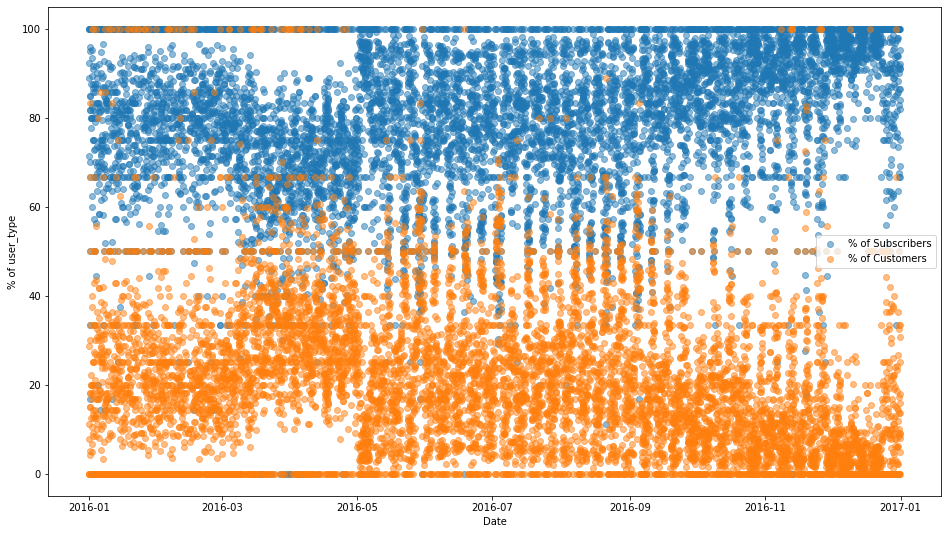

In [108]:
plt.figure(figsize = (16,9))



plt.scatter(bostonUt["date_time"], 
         bostonUt["%_Subsciber"], 
         label="% of Subscribers", alpha=0.5)
plt.scatter(bostonUt["date_time"], 
         bostonUt["%_Customer"], 
         label="% of Customers", alpha=0.5)

plt.xlabel("Date")
plt.ylabel("% of user_type")

plt.legend()
plt.show()

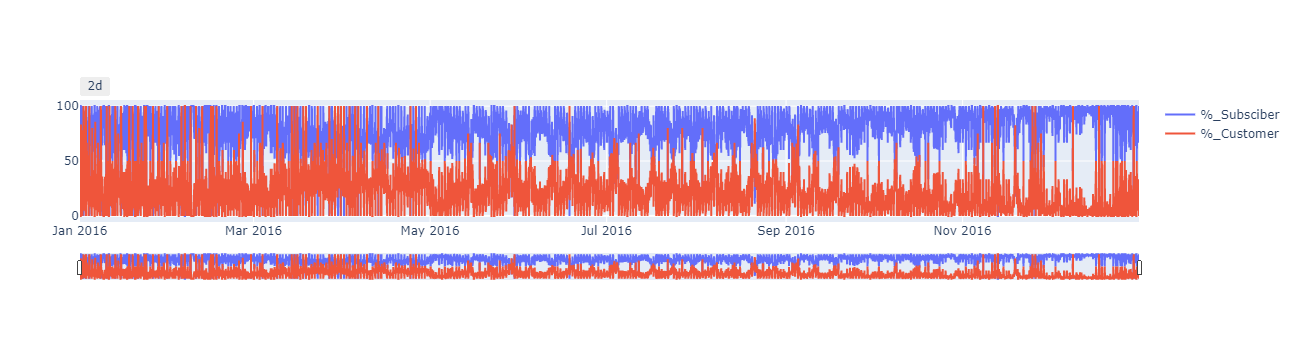

In [110]:
plot = px.Figure()

plot.add_trace(px.Scatter(x=bostonUt["date_time"],
                         y= bostonUt["%_Subsciber"],
                         name="%_Subsciber"))
plot.add_trace(px.Scatter(x=bostonUt["date_time"],
                         y= bostonUt["%_Customer"],
                         name="%_Customer"))

plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=2,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
  
plot.show()


###
### Task 3 Predictive Analytics